<a href="https://colab.research.google.com/github/ravi-gopalan/ipl_analysis/blob/master/ipl_analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 May 31 16:17 .
drwxr-xr-x 1 root root 4096 Jun 15 01:09 ..
drwxr-xr-x 1 root root 4096 Jun 12 16:04 .config
drwxr-xr-x 1 root root 4096 May 31 16:17 sample_data


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content

/content


In [0]:
!mkdir ipl

In [5]:
cd /content/ipl

/content/ipl


In [6]:
cd /root

/root


In [0]:
!mkdir .kaggle

In [0]:
!cp '/content/gdrive/My Drive/Colab_stuff/kaggle.json' /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
cd /content/ipl

/content/ipl


In [10]:
!kaggle datasets download -d ravijee/ipl-2008-to-2019 -p /content/ipl

  0% 0.00/4.14M [00:00<?, ?B/s]
100% 4.14M/4.14M [00:00<00:00, 67.8MB/s]


In [11]:
!ls -la

total 4252
drwxr-xr-x 2 root root    4096 Jun 15 01:17 .
drwxr-xr-x 1 root root    4096 Jun 15 01:17 ..
-rw-r--r-- 1 root root 4345524 Jun 15 01:17 ipl-2008-to-2019.zip


In [12]:
pwd

'/content/ipl'

In [0]:
!unzip -q /content/ipl/ipl-2008-to-2019.zip

In [14]:
!ls -la

total 66180
drwxr-xr-x 2 root root     4096 Jun 15 01:17 .
drwxr-xr-x 1 root root     4096 Jun 15 01:17 ..
---------- 1 root root 61169075 Jun  9 00:37 ball_by_ball_details.csv
-rw-r--r-- 1 root root  4345524 Jun 15 01:17 ipl-2008-to-2019.zip
---------- 1 root root   176133 Jun  9 00:37 ipl_summary.csv
---------- 1 root root  2060580 Jun  9 00:37 ipl.zip


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import datetime as dt

In [0]:
base_dir = Path('/content/ipl')

In [0]:
df_match_summary = pd.read_csv('ipl_summary.csv')

In [18]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
match_id           756 non-null int64
by                 743 non-null object
city               743 non-null object
competition        756 non-null object
dates              756 non-null object
decision           756 non-null object
eliminator         9 non-null object
gender             756 non-null object
match_type         756 non-null object
method             19 non-null object
neutral_venue      77 non-null float64
overs              756 non-null int64
player_of_match    752 non-null object
result             13 non-null object
teams              756 non-null object
umpires            755 non-null object
venue              756 non-null object
winner             756 non-null object
winner_toss        743 non-null object
runs               337 non-null float64
wickets            406 non-null float64
dtypes: float64(3), int64(2), object(16)
memory usage: 124.1+ KB


In [0]:
df_match_summary = df_match_summary.set_index('match_id')

In [20]:
df_match_summary.head()

,by,city,competition,dates,decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,teams,umpires,venue,winner,winner_toss,runs,wickets
match_id,,,,,,,,,,,,,,,,,,,,
548336,{'runs': 46},Jaipur,IPL,['2012-04-23'],field,NaN,male,T20,NaN,NaN,20,['AB de Villiers'],NaN,"['Rajasthan Royals', 'Royal Challengers Bangal...","['Asad Rauf', 'S Asnani']",Sawai Mansingh Stadium,Royal Challengers Bangalore,Rajasthan Royals,46.0,NaN
980901,{'wickets': 9},Mumbai,IPL,['2016-04-09'],bat,NaN,male,T20,NaN,NaN,20,['AM Rahane'],NaN,"['Mumbai Indians', 'Rising Pune Supergiants']","['HDPK Dharmasena', 'CK Nandan']",Wankhede Stadium,Rising Pune Supergiants,Mumbai Indians,NaN,9.0
335998,{'runs': 10},Delhi,IPL,['2008-04-30'],field,NaN,male,T20,NaN,NaN,20,['GD McGrath'],NaN,"['Delhi Daredevils', 'Royal Challengers Bangal...","['Aleem Dar', 'I Shivram']",Feroz Shah Kotla,Delhi Daredevils,Royal Challengers Bangalore,10.0,NaN
1178418,{'wickets': 3},Kolkata,IPL,['2019-04-25'],field,NaN,male,T20,NaN,NaN,20,['VR Aaron'],NaN,"['Kolkata Knight Riders', 'Rajasthan Royals']","['AY Dandekar', 'IJ Gould']",Eden Gardens,Rajasthan Royals,Rajasthan Royals,NaN,3.0
1175357,{'wickets': 6},Kolkata,IPL,['2019-03-24'],field,NaN,male,T20,NaN,NaN,20,['AD Russell'],NaN,"['Kolkata Knight Riders', 'Sunrisers Hyderabad']","['CB Gaffaney', 'AK Chaudhary']",Eden Gardens,Kolkata Knight Riders,Kolkata Knight Riders,NaN,6.0


In [0]:
df_match_summary['match_date'] = pd.to_datetime(df_match_summary['dates'].str[2:12])

In [22]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 548336 to 501226
Data columns (total 21 columns):
by                 743 non-null object
city               743 non-null object
competition        756 non-null object
dates              756 non-null object
decision           756 non-null object
eliminator         9 non-null object
gender             756 non-null object
match_type         756 non-null object
method             19 non-null object
neutral_venue      77 non-null float64
overs              756 non-null int64
player_of_match    752 non-null object
result             13 non-null object
teams              756 non-null object
umpires            755 non-null object
venue              756 non-null object
winner             756 non-null object
winner_toss        743 non-null object
runs               337 non-null float64
wickets            406 non-null float64
match_date         756 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(16)
mem

In [0]:
df_match_summary['player_of_match'] = df_match_summary['player_of_match'].str[2:-2]
df_match_summary.drop(['by','dates'], axis=1, inplace=True)
df_match_summary.rename(columns={'decision':'toss_decision'}, inplace=True)

In [24]:
df_teams = pd.DataFrame(df_match_summary.teams.str.split(',',n=2,expand=True))
df_teams.rename(columns={0:'team_1',1:'team_2'},inplace=True)
df_teams.team_1 = df_teams.team_1.str[2:-1] 
df_teams.team_2 = df_teams.team_2.str[2:-2] 
df_teams.head()

,team_1,team_2
match_id,,
548336,Rajasthan Royals,Royal Challengers Bangalore
980901,Mumbai Indians,Rising Pune Supergiants
335998,Delhi Daredevils,Royal Challengers Bangalore
1178418,Kolkata Knight Riders,Rajasthan Royals
1175357,Kolkata Knight Riders,Sunrisers Hyderabad


In [25]:
df_umpires = pd.DataFrame(df_match_summary.umpires.str.split(',',n=4,expand=True))
df_umpires.rename(columns={0:'umpire_1',1:'umpire_2',2:'umpire_3',3:'umpire_4'},inplace=True)
df_umpires.umpire_1 = df_umpires.umpire_1.str[2:-1] 
df_umpires.umpire_2 = df_umpires.umpire_2.str[2:-2]
df_umpires.umpire_3 = df_umpires.umpire_3.str[2:-2]
df_umpires.umpire_4 = df_umpires.umpire_4.str[2:-2]

df_umpires.head()

,umpire_1,umpire_2,umpire_3,umpire_4
match_id,,,,
548336,Asad Rauf,S Asnani,None,None
980901,HDPK Dharmasena,CK Nandan,None,None
335998,Aleem Dar,I Shivram,None,None
1178418,AY Dandekar,IJ Gould,None,None
1175357,CB Gaffaney,AK Chaudhary,None,None


In [0]:
df_match_summary = df_match_summary.join(df_teams) 
df_match_summary = df_match_summary.join(df_umpires) 
df_match_summary.drop(['teams','umpires'], axis=1, inplace=True)
df_match_summary.rename(columns={'runs':'won_by_runs','wickets':'won_by_wickets'}, inplace=True)

Map team names to abbreviations and standardize names

In [0]:
team_names = {'Rajasthan Royals':'RR',\
              'Mumbai Indians' : 'MI',\
              'Delhi Daredevils':'DD',\
              'Kolkata Knight Riders':'KKR',\
              'Kings XI Punjab':'KXP',\
              'Sunrisers Hyderabad':'SRH',\
              'Deccan Chargers':'DC-Chargers',\
              'Chennai Super Kings':'CSK',\
              'Rising Pune Supergiants':'RPS',\
              'Royal Challengers Bangalore':'RCB',\
              'Pune Warriors':'PW',\
              'Gujarat Lions':'GL',\
              'Delhi Capitals':'DC-Capitals',\
              'Rising Pune Supergiant':'RPS',\
              'Kochi Tuskers Kerala':'KTK'
             }

In [0]:
df_match_summary['winner_toss'] = df_match_summary['winner_toss'].map(team_names)

In [0]:
df_match_summary['winner'] = df_match_summary['winner'].map(team_names)
df_match_summary['team_1'] = df_match_summary['team_1'].map(team_names)
df_match_summary['team_2'] = df_match_summary['team_2'].map(team_names)

In [0]:
df_match_summary['season'] = df_match_summary['match_date'].dt.year

In [31]:
df_match_summary.head()

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season
match_id,,,,,,,,,,,,,,,,,,,,,,,,
548336,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
980901,Mumbai,IPL,bat,NaN,male,T20,NaN,NaN,20,AM Rahane,NaN,Wankhede Stadium,RPS,MI,NaN,9.0,2016-04-09,MI,RPS,HDPK Dharmasena,CK Nandan,None,None,2016
335998,Delhi,IPL,field,NaN,male,T20,NaN,NaN,20,GD McGrath,NaN,Feroz Shah Kotla,DD,RCB,10.0,NaN,2008-04-30,DD,RCB,Aleem Dar,I Shivram,None,None,2008
1178418,Kolkata,IPL,field,NaN,male,T20,NaN,NaN,20,VR Aaron,NaN,Eden Gardens,RR,RR,NaN,3.0,2019-04-25,KKR,RR,AY Dandekar,IJ Gould,None,None,2019
1175357,Kolkata,IPL,field,NaN,male,T20,NaN,NaN,20,AD Russell,NaN,Eden Gardens,KKR,KKR,NaN,6.0,2019-03-24,KKR,SRH,CB Gaffaney,AK Chaudhary,None,None,2019


In [0]:
df_match_summary.to_csv('match_summary.csv')

In [33]:
df_details = pd.read_csv('ball_by_ball_details.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_details = df_details.drop(columns=['by','competition','dates','decision','eliminator','gender','match_type','neutral_venue',\
                                      'overs','player_of_match','city','result','teams','umpires','winner','winner_toss','runs',\
                                      'wickets','match_date','season','venue'])

In [0]:
df_details['batting_team'] = df_details['batting_team'].map(team_names)

In [36]:
df_details.head()

,Unnamed: 0,0,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,fielders,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over
0,0,NaN,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,NaN,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,NaN,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,NaN,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,NaN,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [0]:
df_details['wides'] = df_details['wides'].astype('float')
df_details['noballs'] = df_details['noballs'].astype('float')
df_details['legbyes'] = df_details['legbyes'].astype('float')
df_details['byes'] = df_details['byes'].astype('float')


In [38]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 27 columns):
Unnamed: 0      176711 non-null int64
0               0 non-null float64
0_extras        0 non-null float64
batsman         176702 non-null object
batsman_runs    176702 non-null float64
batting_team    176711 non-null object
bowler          176702 non-null object
byes            476 non-null float64
extras_runs     176061 non-null float64
fielders        6245 non-null object
kind            8702 non-null object
legbyes         2897 non-null float64
level_0         176711 non-null object
level_1         176711 non-null float64
match_id        176711 non-null int64
noballs         702 non-null float64
non_striker     176702 non-null object
player_out      8702 non-null object
total           176702 non-null float64
wides           5337 non-null float64
0.1             0 non-null float64
0_wickets       0 non-null float64
non_boundary    14 non-null float64
extras          641 n

In [39]:
df_fielders = pd.DataFrame(df_details.fielders.str.split(',',n=2,expand=True))


df_fielders.rename(columns={0:'fielder_1',1:'fielder_2',2:'fielder_3'},inplace=True)
df_fielders.head()


,fielder_1,fielder_2,fielder_3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [40]:
df_fielders[df_fielders['fielder_1'].notnull() & df_fielders['fielder_2'].notnull() & df_fielders['fielder_3'].notnull()]


,fielder_1,fielder_2,fielder_3
13155,['P Negi','CH Morris','Q de Kock']
14840,['LJ Wright','RV Uthappa','AD Mathews']
38293,['AA Jhunjhunwala','FY Fazal','NV Ojha']
58242,['SK Raina','RA Jadeja','MM Sharma']
65764,['STR Binny','Sachin Baby','KK Cooper']
73311,['Joginder Sharma','JDP Oram','MS Dhoni']
92927,['SR Watson','JP Faulkner','DH Yagnik']
114173,['MF Maharoof','Shoaib Malik (sub)','KD Karthik']
139031,['M Vijay','MS Dhoni','JA Morkel']
169068,['Z Khan','KK Nair','Q de Kock']


In [0]:
df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\[","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\[","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\[","")
df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\]","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\]","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\]","")


df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\'","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\'","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\'","")

In [42]:
print(df_fielders[df_fielders['fielder_1'].notnull() & df_fielders['fielder_2'].notnull() & df_fielders['fielder_3'].notnull()].head(5))
print(df_fielders[df_fielders['fielder_1'].notnull()].head(5))

             fielder_1     fielder_2    fielder_3
13155           P Negi     CH Morris    Q de Kock
14840        LJ Wright    RV Uthappa   AD Mathews
38293  AA Jhunjhunwala      FY Fazal      NV Ojha
58242         SK Raina     RA Jadeja    MM Sharma
65764        STR Binny   Sachin Baby    KK Cooper
               fielder_1 fielder_2 fielder_3
21              BJ Hodge      None      None
57              BJ Hodge      None      None
170  LA Pomersbach (sub)      None      None
193       AB de Villiers      None      None
198           MA Agarwal      None      None


In [43]:
df_fielders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 3 columns):
fielder_1    6245 non-null object
fielder_2    385 non-null object
fielder_3    11 non-null object
dtypes: object(3)
memory usage: 4.0+ MB


In [44]:
df_details = df_details.join(df_fielders)
df_details.drop(['fielders'], axis=1, inplace=True)
df_details.head()

,Unnamed: 0,0,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3
0,0,NaN,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1,1,NaN,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2,2,NaN,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
3,3,NaN,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
4,4,NaN,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


In [45]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 29 columns):
Unnamed: 0      176711 non-null int64
0               0 non-null float64
0_extras        0 non-null float64
batsman         176702 non-null object
batsman_runs    176702 non-null float64
batting_team    176711 non-null object
bowler          176702 non-null object
byes            476 non-null float64
extras_runs     176061 non-null float64
kind            8702 non-null object
legbyes         2897 non-null float64
level_0         176711 non-null object
level_1         176711 non-null float64
match_id        176711 non-null int64
noballs         702 non-null float64
non_striker     176702 non-null object
player_out      8702 non-null object
total           176702 non-null float64
wides           5337 non-null float64
0.1             0 non-null float64
0_wickets       0 non-null float64
non_boundary    14 non-null float64
extras          641 non-null float64
penalty         2 non

In [0]:
df_details['level_1'] = df_details['level_1'].astype(str)

In [0]:
delivery = {'0.1': '1','0.2': '2', '0.3': '3', '0.4': '4', '0.5': '5', '0.6': '6', '0.7': '7', '0.8': '8', '0.9': '9',\
         '1.1': '1','1.2': '2', '1.3': '3', '1.4': '4', '1.5': '5', '1.6': '6', '1.7': '7', '1.8': '8', '1.9': '9',\
         '2.1': '1','2.2': '2', '2.3': '3', '2.4': '4', '2.5': '5', '2.6': '6', '2.7': '7', '2.8': '8', '2.9': '9',\
         '3.1': '1','3.2': '2', '3.3': '3', '3.4': '4', '3.5': '5', '3.6': '6', '3.7': '7', '3.8': '8', '3.9': '9',\
         '4.1': '1','4.2': '2', '4.3': '3', '4.4': '4', '4.5': '5', '4.6': '6', '4.7': '7', '4.8': '8', '4.9': '9',\
         '5.1': '1','5.2': '2', '5.3': '3', '5.4': '4', '5.5': '5', '5.6': '6', '5.7': '7', '5.8': '8', '5.9': '9',\
         '6.1': '1','6.2': '2', '6.3': '3', '6.4': '4', '6.5': '5', '6.6': '6', '6.7': '7', '6.8': '8', '6.9': '9',\
         '7.1': '1','7.2': '2', '7.3': '3', '7.4': '4', '7.5': '5', '7.6': '6', '7.7': '7', '7.8': '8', '7.9': '9',\
         '8.1': '1','8.2': '2', '8.3': '3', '8.4': '4', '8.5': '5', '8.6': '6', '8.7': '7', '8.8': '8', '8.9': '9',\
         '9.1': '1','9.2': '2', '9.3': '3', '9.4': '4', '9.5': '5', '9.6': '6', '9.7': '7', '9.8': '8', '9.9': '9',\
         '10.1': '1','10.2': '2', '10.3': '3', '10.4': '4', '10.5': '5', '10.6': '6', '10.7': '7', '10.8': '8', '10.9': '9',\
         '11.1': '1','11.2': '2', '11.3': '3', '11.4': '4', '11.5': '5', '11.6': '6', '11.7': '7', '11.8': '8', '11.9': '9',\
         '12.1': '1','12.2': '2', '12.3': '3', '12.4': '4', '12.5': '5', '12.6': '6', '12.7': '7', '12.8': '8', '12.9': '9',\
         '13.1': '1','13.2': '2', '13.3': '3', '13.4': '4', '13.5': '5', '13.6': '6', '13.7': '7', '13.8': '8', '13.9': '9',\
         '14.1': '1','14.2': '2', '14.3': '3', '14.4': '4', '14.5': '5', '14.6': '6', '14.7': '7', '14.8': '8', '14.9': '9',\
         '15.1': '1','15.2': '2', '15.3': '3', '15.4': '4', '15.5': '5', '15.6': '6', '15.7': '7', '15.8': '8', '15.9': '9',\
         '16.1': '1','16.2': '2', '16.3': '3', '16.4': '4', '16.5': '5', '16.6': '6', '16.7': '7', '16.8': '8', '16.9': '9',\
         '17.1': '1','17.2': '2', '17.3': '3', '17.4': '4', '17.5': '5', '17.6': '6', '17.7': '7', '17.8': '8', '17.9': '9',\
         '18.1': '1','18.2': '2', '18.3': '3', '18.4': '4', '18.5': '5', '18.6': '6', '18.7': '7', '18.8': '8', '18.9': '9',\
         '19.1': '1','19.2': '2', '19.3': '3', '19.4': '4', '19.5': '5', '19.6': '6', '19.7': '7', '19.8': '8', '19.9': '9',\
        }

In [0]:
df_details['delivery'] = df_details['level_1'].map(delivery)

In [0]:
df_details['over'] = df_details['over'].astype(str)
inning_quarter = {'1': 'Q1','2': 'Q1', '3': 'Q1', '4': 'Q1', '5': 'Q1', \
                '6': 'Q2', '7': 'Q2', '8': 'Q2', '9': 'Q2', '10': 'Q2',\
                '11': 'Q3','12': 'Q3', '13': 'Q3', '14': 'Q3', '15': 'Q3',\
                '16': 'Q4', '17': 'Q4', '18': 'Q4', '19': 'Q4', '20': 'Q4'\
                }
df_details['inning_quarter'] = df_details['over'].map(inning_quarter)

In [50]:
df_details.head()

,Unnamed: 0,0,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter
0,0,NaN,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1
1,1,NaN,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1
2,2,NaN,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1
3,3,NaN,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1
4,4,NaN,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1


In [51]:
df_details[df_details.player_out.notna()].head()

,Unnamed: 0,0,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter
21,21,NaN,NaN,V Kohli,0.0,RCB,Pankaj Singh,NaN,0.0,caught,NaN,inning_1,3.4,548336,NaN,TM Dilshan,V Kohli,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,BJ Hodge,None,None,4,Q1
57,57,NaN,NaN,MA Agarwal,0.0,RCB,GB Hogg,NaN,0.0,caught,NaN,inning_1,9.4,548336,NaN,TM Dilshan,MA Agarwal,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,BJ Hodge,None,None,4,Q2
69,69,NaN,NaN,CH Gayle,0.0,RCB,GB Hogg,NaN,0.0,lbw,NaN,inning_1,11.4,548336,NaN,TM Dilshan,CH Gayle,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,4,Q3
170,170,NaN,NaN,AM Rahane,0.0,RR,KP Appanna,NaN,0.0,caught,NaN,inning_2,7.2,548336,NaN,R Dravid,AM Rahane,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,LA Pomersbach (sub),None,None,2,Q2
193,193,NaN,NaN,OA Shah,0.0,RR,KP Appanna,NaN,0.0,stumped,NaN,inning_2,11.1,548336,NaN,R Dravid,OA Shah,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,AB de Villiers,None,None,1,Q3


In [52]:
df_details['kind'].unique()

array([nan, 'caught', 'lbw', 'stumped', 'bowled', 'run out', 'hit wicket',
       'caught and bowled', 'retired hurt', 'obstructing the field'],
      dtype=object)

In [0]:
def attribute_catch (row):
  if row['kind'] == 'caught':
    value = row['fielder_1']
  elif row['kind'] == 'caught and bowled':
    value = row['bowler']
  else:
    value = None
  return value

df_details['catch_attributed_to'] = df_details.apply (lambda row: attribute_catch(row), axis=1)

In [0]:
def attribute_wicket (row):
    if row['kind'] == 'caught':
      value = row['bowler']
    elif row['kind'] == 'lbw':
      value = row['bowler']
    elif row['kind'] == 'stumped':
      value = row['bowler']
    elif row['kind'] == 'bowled':
      value = row['bowler']
    elif row['kind'] == 'hit wicket':
      value = row['bowler']
    elif row['kind'] == 'caught and bowled':
      value = row['bowler']
    else:
      value = None
    return value
  
df_details['wicket_attributed_to'] = df_details.apply( lambda row: attribute_wicket(row), axis = 1)

In [55]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 33 columns):
Unnamed: 0              176711 non-null int64
0                       0 non-null float64
0_extras                0 non-null float64
batsman                 176702 non-null object
batsman_runs            176702 non-null float64
batting_team            176711 non-null object
bowler                  176702 non-null object
byes                    476 non-null float64
extras_runs             176061 non-null float64
kind                    8702 non-null object
legbyes                 2897 non-null float64
level_0                 176711 non-null object
level_1                 176711 non-null object
match_id                176711 non-null int64
noballs                 702 non-null float64
non_striker             176702 non-null object
player_out              8702 non-null object
total                   176702 non-null float64
wides                   5337 non-null float64
0.1          

In [56]:
df_details['wicket_attributed_to'].value_counts()


SL Malinga          168
A Mishra            155
Harbhajan Singh     149
PP Chawla           148
DJ Bravo            147
B Kumar             132
R Ashwin            125
SP Narine           122
UT Yadav            117
RA Jadeja           108
A Nehra             105
Z Khan              102
R Vinay Kumar       101
YS Chahal           100
DW Steyn             95
Sandeep Sharma       94
SR Watson            92
MM Sharma            91
P Kumar              90
RP Singh             90
PP Ojha              89
DS Kulkarni          86
JA Morkel            83
Imran Tahir          79
IK Pathan            79
JJ Bumrah            78
M Morkel             75
L Balaji             75
JD Unadkat           73
MM Patel             73
                   ... 
T Henderson           1
DB Ravi Teja          1
AM Rahane             1
AC Gilchrist          1
SE Rutherford         1
A Nel                 1
PM Sarvesh Kumar      1
CL White              1
SB Joshi              1
MJ Henry              1
CJ McKay        

In [57]:
df_details.query('kind == "caught and bowled"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1263 to 176268
Data columns (total 33 columns):
Unnamed: 0              250 non-null int64
0                       0 non-null float64
0_extras                0 non-null float64
batsman                 250 non-null object
batsman_runs            250 non-null float64
batting_team            250 non-null object
bowler                  250 non-null object
byes                    0 non-null float64
extras_runs             250 non-null float64
kind                    250 non-null object
legbyes                 0 non-null float64
level_0                 250 non-null object
level_1                 250 non-null object
match_id                250 non-null int64
noballs                 0 non-null float64
non_striker             250 non-null object
player_out              250 non-null object
total                   250 non-null float64
wides                   0 non-null float64
0.1                     0 non-null float64
0_wickets      

In [58]:
df_details.query('kind == "caught"')['fielder_1']

21                   BJ Hodge
57                   BJ Hodge
170       LA Pomersbach (sub)
198                MA Agarwal
206                TM Dilshan
216                MA Agarwal
229                DL Vettori
248             R Vinay Kumar
275                  MS Dhoni
280                  R Ashwin
319                 AM Rahane
344              F du Plessis
366                 SPD Smith
557                  R Dravid
578                   P Kumar
593                  S Dhawan
614                  S Dhawan
618                 VY Mahesh
682                  V Sehwag
759                  VR Aaron
811                   R Parag
815                 AM Rahane
894                AD Russell
911                  RK Singh
928              Shubman Gill
1052               RV Uthappa
1088              Rashid Khan
1153                  B Kumar
1298                  J Botha
1341                 AR Patel
                 ...         
175749              LJ Wright
175788             RV Uthappa
175790    

In [59]:
df_details.head()

,Unnamed: 0,0,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to
0,0,NaN,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None
1,1,NaN,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None
2,2,NaN,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None
3,3,NaN,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None
4,4,NaN,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None


In [60]:
df_details['batsman_runs'][df_details['batsman_runs'] == 6.0].count()

8082

In [0]:
def flag_boundary_4 (row):
    if row['batsman_runs'] == 4.0:
      value = 1
    else:
      value = None  
    return value

def flag_boundary_6 (row):
    if row['batsman_runs'] == 6.0:
      value = 1
    else:
      value = None  
    return value

def flag_dot_ball (row):
    if row['batsman_runs'] == 0.0:
      value = 1
    else:
      value = None  
    return value
  
  
def flag_1_run_ball (row):
    if row['batsman_runs'] == 1.0:
      value = 1
    else:
      value = None  
    return value
  
def flag_2_run_ball (row):
    if row['batsman_runs'] == 2.0:
      value = 1
    else:
      value = None  
    return value

def flag_3_run_ball (row):
    if row['batsman_runs'] == 3.0:
      value = 1
    else:
      value = None  
    return value
  
def flag_5_run_ball (row):
    if row['batsman_runs'] == 5.0:
      value = 1
    else:
      value = None  
    return value
  
  
df_details['4_flag'] = df_details.apply(lambda row: flag_boundary_4(row), axis=1)
df_details['6_flag'] = df_details.apply( lambda row: flag_boundary_6(row), axis = 1)
df_details['dot_ball_flag'] = df_details.apply( lambda row: flag_dot_ball(row), axis = 1)
df_details['1_run_flag'] = df_details.apply( lambda row: flag_1_run_ball(row), axis = 1)
df_details['2_run_flag'] = df_details.apply( lambda row: flag_2_run_ball(row), axis = 1)
df_details['3_run_flag'] = df_details.apply( lambda row: flag_3_run_ball(row), axis = 1)
df_details['5_run_flag'] = df_details.apply( lambda row: flag_5_run_ball(row), axis = 1)

In [62]:
df_details.kind.unique()

array([nan, 'caught', 'lbw', 'stumped', 'bowled', 'run out', 'hit wicket',
       'caught and bowled', 'retired hurt', 'obstructing the field'],
      dtype=object)

In [0]:
def flag_caught (row):
    if row['kind'] == 'caught':
      value = 1
    else:
      value = None  
    return value

def flag_lbw (row):
    if row['kind'] == 'lbw':
      value = 1
    else:
      value = None  
    return value

def flag_stumped (row):
    if row['kind'] == 'stumped':
      value = 1
    else:
      value = None  
    return value
  
  
def flag_bowled (row):
    if row['kind'] == 'bowled':
      value = 1
    else:
      value = None  
    return value
  
def flag_run_out (row):
    if row['kind'] == 'run out':
      value = 1
    else:
      value = None  
    return value

def flag_hit_wicket (row):
    if row['kind'] == 'hit wicket':
      value = 1
    else:
      value = None  
    return value
  
def flag_caught_and_bowled (row):
    if row['kind'] == 'caught and bowled':
      value = 1
    else:
      value = None  
    return value

def flag_retired_hurt (row):
    if row['kind'] == 'retired hurt':
      value = 1
    else:
      value = None  
    return value

def flag_obstructing_the_field (row):
    if row['kind'] == 'obstructing the field':
      value = 1
    else:
      value = None  
    return value  

  
df_details['caught_flag'] = df_details.apply(lambda row: flag_caught(row), axis=1)
df_details['lbw_flag'] = df_details.apply( lambda row: flag_lbw(row), axis = 1)
df_details['stumped_flag'] = df_details.apply( lambda row: flag_stumped(row), axis = 1)
df_details['bowled_flag'] = df_details.apply( lambda row: flag_bowled(row), axis = 1)
df_details['run_out_flag'] = df_details.apply( lambda row: flag_run_out(row), axis = 1)
df_details['hit_wicket_flag'] = df_details.apply( lambda row: flag_hit_wicket(row), axis = 1)
df_details['caught_and_bowled_flag'] = df_details.apply( lambda row: flag_caught_and_bowled(row), axis = 1)
df_details['retired_hurt_flag'] = df_details.apply( lambda row: flag_retired_hurt(row), axis = 1)
df_details['obstructing_the_field_flag'] = df_details.apply( lambda row: flag_obstructing_the_field(row), axis = 1)

In [64]:
df_details[df_details['wides'].notna()].head()

,Unnamed: 0,0,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
71,71,NaN,NaN,TM Dilshan,0.0,RCB,GB Hogg,NaN,5.0,NaN,NaN,inning_1,11.6,548336,NaN,AB de Villiers,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,6,Q3,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,104,NaN,NaN,TM Dilshan,0.0,RCB,KK Cooper,NaN,1.0,NaN,NaN,inning_1,17.1,548336,NaN,AB de Villiers,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,1,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,121,NaN,NaN,AB de Villiers,0.0,RCB,KK Cooper,NaN,1.0,NaN,NaN,inning_1,19.4,548336,NaN,TM Dilshan,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,4,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,126,NaN,NaN,R Dravid,0.0,RR,Z Khan,NaN,1.0,NaN,NaN,inning_2,0.2,548336,NaN,AM Rahane,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,131,NaN,NaN,AM Rahane,0.0,RR,Z Khan,NaN,1.0,NaN,NaN,inning_2,0.7,548336,NaN,R Dravid,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,7,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_details['wide_flag'] = df_details['wides'].notna()
df_details['noball_flag'] = df_details['noballs'].notna()
df_details['legbye_flag'] = df_details['legbyes'].notna()
df_details['bye_flag'] = df_details['byes'].notna()

In [66]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 53 columns):
Unnamed: 0                    176711 non-null int64
0                             0 non-null float64
0_extras                      0 non-null float64
batsman                       176702 non-null object
batsman_runs                  176702 non-null float64
batting_team                  176711 non-null object
bowler                        176702 non-null object
byes                          476 non-null float64
extras_runs                   176061 non-null float64
kind                          8702 non-null object
legbyes                       2897 non-null float64
level_0                       176711 non-null object
level_1                       176711 non-null object
match_id                      176711 non-null int64
noballs                       702 non-null float64
non_striker                   176702 non-null object
player_out                    8702 non-null object
total

In [0]:
df_details.drop(['0'], inplace=True, axis=1)

In [0]:
df_details.drop(['Unnamed: 0'], inplace=True, axis=1)

In [69]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 51 columns):
0_extras                      0 non-null float64
batsman                       176702 non-null object
batsman_runs                  176702 non-null float64
batting_team                  176711 non-null object
bowler                        176702 non-null object
byes                          476 non-null float64
extras_runs                   176061 non-null float64
kind                          8702 non-null object
legbyes                       2897 non-null float64
level_0                       176711 non-null object
level_1                       176711 non-null object
match_id                      176711 non-null int64
noballs                       702 non-null float64
non_striker                   176702 non-null object
player_out                    8702 non-null object
total                         176702 non-null float64
wides                         5337 non-null float64


In [70]:
df_details.head()

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
0,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
1,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
3,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_not_out_check = df_details[['match_id','level_0','batsman','player_out','kind']].drop_duplicates()

In [72]:
df_not_out_check.query('kind=="run out"')

,match_id,level_0,batsman,player_out,kind
497,335998,inning_1,G Gambhir,V Sehwag,run out
778,1178418,inning_1,KD Karthik,SP Narine,run out
1428,829791,inning_2,J Botha,J Botha,run out
1440,829791,inning_2,PP Chawla,GB Hogg,run out
1771,1175366,inning_1,DA Warner,V Shankar,run out
1824,1175366,inning_2,S Dube,MM Ali,run out
1893,1175366,inning_2,C de Grandhomme,UT Yadav,run out
1901,1175366,inning_2,Mohammed Siraj,C de Grandhomme,run out
1983,1136608,inning_1,R Ashwin,R Ashwin,run out
1995,1136608,inning_1,MM Sharma,MM Sharma,run out


In [73]:
df_not_out_check.head(5)

,match_id,level_0,batsman,player_out,kind
0,548336,inning_1,V Kohli,NaN,NaN
2,548336,inning_1,TM Dilshan,NaN,NaN
21,548336,inning_1,V Kohli,V Kohli,caught
23,548336,inning_1,MA Agarwal,NaN,NaN
57,548336,inning_1,MA Agarwal,MA Agarwal,caught


In [0]:
def check_out(row):
  if row['kind'] != 'NaN' and row['player_out'] == row['batsman']:
    value = row['batsman']
  elif row['kind'] !='NaN' and row['player_out'] != row['batsman']:
    value = row['player_out']
  else:
    value = None
  return value

df_not_out_check['out'] = df_not_out_check.apply(lambda row: check_out(row),axis=1)

In [75]:
df_not_out_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19434 entries, 0 to 176708
Data columns (total 6 columns):
match_id      19434 non-null int64
level_0       19434 non-null object
batsman       19425 non-null object
player_out    8702 non-null object
kind          8702 non-null object
out           8702 non-null object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [76]:
df_not_out_check.query('kind=="run out"').head()

,match_id,level_0,batsman,player_out,kind,out
497,335998,inning_1,G Gambhir,V Sehwag,run out,V Sehwag
778,1178418,inning_1,KD Karthik,SP Narine,run out,SP Narine
1428,829791,inning_2,J Botha,J Botha,run out,J Botha
1440,829791,inning_2,PP Chawla,GB Hogg,run out,GB Hogg
1771,1175366,inning_1,DA Warner,V Shankar,run out,V Shankar


In [0]:
df_not_out = df_not_out_check.groupby(['match_id','level_0','player_out'],as_index=False)['out'].count()

In [78]:
df_not_out.head()

,match_id,level_0,player_out,out
0,335982,inning_1,DJ Hussey,1
1,335982,inning_1,RT Ponting,1
2,335982,inning_1,SC Ganguly,1
3,335982,inning_2,AA Noffke,1
4,335982,inning_2,B Akhil,1


In [79]:
df_not_out.tail()

,match_id,level_0,player_out,out
8697,1181768,inning_2,F du Plessis,1
8698,1181768,inning_2,MS Dhoni,1
8699,1181768,inning_2,SK Raina,1
8700,1181768,inning_2,SN Thakur,1
8701,1181768,inning_2,SR Watson,1


In [80]:
df_not_out.player_out.nunique()

486

In [81]:
df_not_out.query('match_id=="336002"')

,match_id,level_0,player_out,out
236,336002,inning_1,AC Gilchrist,1
237,336002,inning_1,AS Yadav,1
238,336002,inning_1,DB Ravi Teja,1
239,336002,inning_1,HH Gibbs,1
240,336002,inning_1,LPC Silva,1
241,336002,inning_1,RG Sharma,1
242,336002,inning_1,RP Singh,1
243,336002,inning_1,SB Bangar,1
244,336002,inning_1,WPUJC Vaas,1
245,336002,inning_1,Y Venugopal Rao,1


In [82]:
df_details.query('match_id=="336002" & kind =="run out"')

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
21848,NaN,AS Yadav,0.0,DC-Chargers,R Vinay Kumar,NaN,0.0,run out,NaN,inning_1,18.4,336002,NaN,SB Bangar,SB Bangar,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,R Vinay Kumar,None,None,4,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
21853,NaN,AS Yadav,0.0,DC-Chargers,DW Steyn,NaN,0.0,run out,NaN,inning_1,19.2,336002,NaN,WPUJC Vaas,WPUJC Vaas,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,SP Goswami,None,None,2,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
21873,NaN,JH Kallis,0.0,RCB,WPUJC Vaas,NaN,0.0,run out,NaN,inning_2,2.4,336002,NaN,W Jaffer,W Jaffer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,AS Yadav,None,None,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
21899,NaN,JH Kallis,0.0,RCB,SB Bangar,NaN,0.0,run out,NaN,inning_2,6.6,336002,NaN,Misbah-ul-Haq,JH Kallis,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,LPC Silva,None,None,6,Q2,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False


In [83]:
df_not_out.query('match_id =="335989"')

,match_id,level_0,player_out,out
79,335989,inning_1,MEK Hussey,1
80,335989,inning_1,ML Hayden,1
81,335989,inning_1,MS Dhoni,1
82,335989,inning_1,PA Patel,1
83,335989,inning_1,SK Raina,1
84,335989,inning_2,DJ Bravo,1
85,335989,inning_2,Harbhajan Singh,1
86,335989,inning_2,L Ronchi,1
87,335989,inning_2,MA Khote,1
88,335989,inning_2,RV Uthappa,1


In [84]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8702 entries, 0 to 8701
Data columns (total 4 columns):
match_id      8702 non-null int64
level_0       8702 non-null object
player_out    8702 non-null object
out           8702 non-null int64
dtypes: int64(2), object(2)
memory usage: 339.9+ KB


In [0]:
df_not_out.to_csv('players_out_by_match_view.csv')

In [86]:
df_details['0_extras'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 0_extras, dtype: float64

In [87]:
df_details['0_extras'].value_counts()

Series([], Name: 0_extras, dtype: int64)

In [0]:
df_details.to_csv('cleansed_ball_by_ball_details.csv')

In [89]:
df_details.head()

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
0,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
1,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
3,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_combined = df_details.join(df_match_summary,on='match_id',rsuffix='_ipl_summary')

In [0]:
overs = {'0.1': '1','0.2': '1', '0.3': '1', '0.4': '1', '0.5': '1', '0.6': '1', '0.7': '1', '0.8': '1', '0.9': '1',\
         '1.1': '2','1.2': '2', '1.3': '2', '1.4': '2', '1.5': '2', '1.6': '2', '1.7': '2', '1.8': '2', '1.9': '2',\
         '2.1': '3','2.2': '3', '2.3': '3', '2.4': '3', '2.5': '3', '2.6': '3', '2.7': '3', '2.8': '3', '2.9': '3',\
         '3.1': '4','3.2': '4', '3.3': '4', '3.4': '4', '3.5': '4', '3.6': '4', '3.7': '4', '3.8': '4', '3.9': '4',\
         '4.1': '5','4.2': '5', '4.3': '5', '4.4': '5', '4.5': '5', '4.6': '5', '4.7': '5', '4.8': '5', '4.9': '5',\
         '5.1': '6','5.2': '6', '5.3': '6', '5.4': '6', '5.5': '6', '5.6': '6', '5.7': '6', '5.8': '6', '5.9': '6',\
         '6.1': '7','6.2': '7', '6.3': '7', '6.4': '7', '6.5': '7', '6.6': '7', '6.7': '7', '6.8': '7', '6.9': '7',\
         '7.1': '8','7.2': '8', '7.3': '8', '7.4': '8', '7.5': '8', '7.6': '8', '7.7': '8', '7.8': '8', '7.9': '8',\
         '8.1': '9','8.2': '9', '8.3': '9', '8.4': '9', '8.5': '9', '8.6': '9', '8.7': '9', '8.8': '9', '8.9': '9',\
         '9.1': '10','9.2': '10', '9.3': '10', '9.4': '10', '9.5': '10', '9.6': '10', '9.7': '10', '9.8': '10', '9.9': '10',\
         '10.1': '11','10.2': '11', '10.3': '11', '10.4': '11', '10.5': '11', '10.6': '11', '10.7': '11', '10.8': '11', '10.9': '11',\
         '11.1': '12','11.2': '12', '11.3': '12', '11.4': '12', '11.5': '12', '11.6': '12', '11.7': '12', '11.8': '12', '11.9': '12',\
         '12.1': '13','12.2': '13', '12.3': '13', '12.4': '13', '12.5': '13', '12.6': '13', '12.7': '13', '12.8': '13', '12.9': '13',\
         '13.1': '14','13.2': '14', '13.3': '14', '13.4': '14', '13.5': '14', '13.6': '14', '13.7': '14', '13.8': '14', '13.9': '14',\
         '14.1': '15','14.2': '15', '14.3': '15', '14.4': '15', '14.5': '15', '14.6': '15', '14.7': '15', '14.8': '15', '14.9': '15',\
         '15.1': '16','15.2': '16', '15.3': '16', '15.4': '16', '15.5': '16', '15.6': '16', '15.7': '16', '15.8': '16', '15.9': '16',\
         '16.1': '17','16.2': '17', '16.3': '17', '16.4': '17', '16.5': '17', '16.6': '17', '16.7': '17', '16.8': '17', '16.9': '17',\
         '17.1': '18','17.2': '18', '17.3': '18', '17.4': '18', '17.5': '18', '17.6': '18', '17.7': '18', '17.8': '18', '17.9': '18',\
         '18.1': '19','18.2': '19', '18.3': '19', '18.4': '19', '18.5': '19', '18.6': '19', '18.7': '19', '18.8': '19', '18.9': '19',\
         '19.1': '20','19.2': '20', '19.3': '20', '19.4': '20', '19.5': '20', '19.6': '20', '19.7': '20', '19.8': '20', '19.9': '20'
        }

In [0]:
df_combined['over'] = df_combined['level_1'].map(overs)

In [0]:
df_combined['delivery'] = df_combined['level_1'].map(delivery)

In [94]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 75 columns):
0_extras                      0 non-null float64
batsman                       176702 non-null object
batsman_runs                  176702 non-null float64
batting_team                  176711 non-null object
bowler                        176702 non-null object
byes                          476 non-null float64
extras_runs                   176061 non-null float64
kind                          8702 non-null object
legbyes                       2897 non-null float64
level_0                       176711 non-null object
level_1                       176711 non-null object
match_id                      176711 non-null int64
noballs                       702 non-null float64
non_striker                   176702 non-null object
player_out                    8702 non-null object
total                         176702 non-null float64
wides                         5337 non-null float64


In [0]:
df_combined.to_csv('full_ipl_details.csv')

In [96]:
df_combined.tail()

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season
176706,NaN,NL McCullum,0.0,PW,DE Bollinger,NaN,0.0,caught,NaN,inning_2,19.2,501226,NaN,M Kartik,NL McCullum,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,SB Jakati,None,None,2,Q4,SB Jakati,DE Bollinger,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Chennai,IPL,field,NaN,male,T20,NaN,NaN,20,MEK Hussey,NaN,"MA Chidambaram Stadium, Chepauk",CSK,PW,25.0,NaN,2011-04-25,CSK,PW,Aleem Dar,RB Tiffin,None,None,2011
176707,NaN,M Kartik,1.0,PW,DE Bollinger,NaN,0.0,NaN,NaN,inning_2,19.3,501226,NaN,AC Thomas,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,3,Q4,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Chennai,IPL,field,NaN,male,T20,NaN,NaN,20,MEK Hussey,NaN,"MA Chidambaram Stadium, Chepauk",CSK,PW,25.0,NaN,2011-04-25,CSK,PW,Aleem Dar,RB Tiffin,None,None,2011
176708,NaN,AC Thomas,1.0,PW,DE Bollinger,NaN,0.0,NaN,NaN,inning_2,19.4,501226,NaN,M Kartik,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,4,Q4,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Chennai,IPL,field,NaN,male,T20,NaN,NaN,20,MEK Hussey,NaN,"MA Chidambaram Stadium, Chepauk",CSK,PW,25.0,NaN,2011-04-25,CSK,PW,Aleem Dar,RB Tiffin,None,None,2011
176709,NaN,M Kartik,0.0,PW,DE Bollinger,NaN,1.0,NaN,1.0,inning_2,19.5,501226,NaN,AC Thomas,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,5,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,Chennai,IPL,field,NaN,male,T20,NaN,NaN,20,MEK Hussey,NaN,"MA Chidambaram Stadium, Chepauk",CSK,PW,25.0,NaN,2011-04-25,CSK,PW,Aleem Dar,RB Tiffin,None,None,2011
176710,NaN,AC Thomas,0.0,PW,DE Bollinger,NaN,0.0,NaN,NaN,inning_2,19.6,501226,NaN,M Kartik,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,6,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Chennai,IPL,field,NaN,male,T20,NaN,NaN,20,MEK Hussey,NaN,"MA Chidambaram Stadium, Chepauk",CSK,PW,25.0,NaN,2011-04-25,CSK,PW,Aleem Dar,RB Tiffin,None,None,2011


In [0]:
def calc_batting_strike_rate(row):
  if row['net_balls_faced'] != 0:
    value = row['runs_scored']/row['net_balls_faced']
  else:
    value = 0
  return value





In [98]:
# Define the aggregation calculations
batsman_aggregations = {
    'batsman_runs': { # work on the "batsman_runs" column
        'runs_scored': 'sum',  # get the sum, and call this result 'total_duration'
        'gross_balls_faced': 'count'
    },
    '4_flag': {     # Now work on the "4_flag" column
        '4s': 'count'},
    '6_flag': {     # Now work on the "6_flag" column
        '6s': 'count'},
    'dot_ball_flag': {     # Now work on the "dot_ball_flag" column
        'dot_balls': 'count'},
    'wide_flag': {     # Now work on the "wide_flag" column
        'wides_faced': 'sum'},
    'noball_flag': {     # Now work on the "noball_flag" column
        'no_balls_faced': 'sum'}, 
    '1_run_flag': {     # Now work on the "1_run_flag" column
        '1s': 'count'},
    '2_run_flag': {     # Now work on the "2_run_flag" column
        '2s': 'count'},
    '3_run_flag': {     # Now work on the "3_run_flag" column
        '3s': 'count'},
    '5_run_flag': {     # Now work on the "5_run_flag" column
        '5s': 'count'}  

}
df_batsman = df_combined.groupby(['match_id','season',\
                                  'match_date','batsman'],as_index=False)['batsman_runs','4_flag','6_flag','dot_ball_flag',\
                                                                          '1_run_flag','2_run_flag','3_run_flag','5_run_flag',\
                                                                          'wide_flag','noball_flag'].agg(batsman_aggregations)
df_batsman['net_balls_faced'] = df_batsman['gross_balls_faced']-df_batsman['wides_faced']-df_batsman['no_balls_faced']
df_batsman['strike_rate'] = df_batsman.apply(lambda row: calc_batting_strike_rate(row), axis=1)

df_batsman.head(20)

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000
5,335982,2008,2008-04-18,JH Kallis,8.0,7,0,1,4,0.0,0.0,2,0,0,0,7.0,1.142857
6,335982,2008,2008-04-18,MV Boucher,7.0,11,1,0,8,2.0,0.0,1,1,0,0,9.0,0.777778
7,335982,2008,2008-04-18,Mohammad Hafeez,5.0,3,1,0,1,0.0,0.0,1,0,0,0,3.0,1.666667
8,335982,2008,2008-04-18,P Kumar,18.0,17,1,2,12,2.0,0.0,2,0,0,0,15.0,1.200000
9,335982,2008,2008-04-18,R Dravid,2.0,3,0,0,1,0.0,0.0,2,0,0,0,3.0,0.666667


In [99]:
df_batsman.query('net_balls_faced==0')

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
5299,598031,2013,2013-04-26,SMSM Senanayake,0.0,1,0,0,1,0.0,1.0,0,0,0,0,0.0,0.0
6272,733979,2014,2014-05-05,MK Pandey,0.0,1,0,0,1,1.0,0.0,0,0,0,0,0.0,0.0
8228,980983,2016,2016-05-12,BB Sran,1.0,1,0,0,0,0.0,1.0,1,0,0,0,0.0,0.0
9604,1136574,2018,2018-04-17,MJ McClenaghan,0.0,1,0,0,1,1.0,0.0,0,0,0,0,0.0,0.0


In [100]:
df_batsman.tail(10)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
11131,1181768,2019,2019-05-12,MJ McClenaghan,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
11132,1181768,2019,2019-05-12,MS Dhoni,2.0,8,0,0,6,0.0,0.0,2,0,0,0,8.0,0.250000
11133,1181768,2019,2019-05-12,Q de Kock,29.0,18,0,4,9,1.0,0.0,5,0,0,0,17.0,1.705882
11134,1181768,2019,2019-05-12,RA Jadeja,5.0,5,0,0,2,0.0,0.0,1,2,0,0,5.0,1.000000
11135,1181768,2019,2019-05-12,RD Chahar,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
11136,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429
11137,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353
11138,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429
11139,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000
11140,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932


In [101]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8702 entries, 0 to 8701
Data columns (total 4 columns):
match_id      8702 non-null int64
level_0       8702 non-null object
player_out    8702 non-null object
out           8702 non-null int64
dtypes: int64(2), object(2)
memory usage: 339.9+ KB


In [0]:
df_batsman_teams = df_combined[['match_id','batsman','batting_team']].drop_duplicates()

In [103]:
df_batsman_teams.query('batsman=="MS Dhoni"')

,match_id,batsman,batting_team
1472,548371,MS Dhoni,CSK
2400,734023,MS Dhoni,CSK
4611,598026,MS Dhoni,CSK
4972,1136603,MS Dhoni,CSK
5196,336013,MS Dhoni,CSK
6305,1136595,MS Dhoni,CSK
6409,829765,MS Dhoni,CSK
7730,980931,MS Dhoni,RPS
11603,598051,MS Dhoni,CSK
12067,598058,MS Dhoni,CSK


In [104]:
df_batsman_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11150 entries, 0 to 176708
Data columns (total 3 columns):
match_id        11150 non-null int64
batsman         11141 non-null object
batting_team    11150 non-null object
dtypes: int64(1), object(2)
memory usage: 348.4+ KB


In [0]:
df_batsman = df_batsman.merge(df_not_out,how='left',left_on=['match_id','batsman'],right_on=['match_id','player_out'])

In [0]:
df_batsman = df_batsman.merge(df_batsman_teams,how='left',left_on=['match_id','batsman'],right_on=['match_id','batsman'])

In [107]:
df_batsman.tail(10)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team
11131,1181768,2019,2019-05-12,MJ McClenaghan,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,MJ McClenaghan,1.0,MI
11132,1181768,2019,2019-05-12,MS Dhoni,2.0,8,0,0,6,0.0,0.0,2,0,0,0,8.0,0.250000,inning_2,MS Dhoni,1.0,CSK
11133,1181768,2019,2019-05-12,Q de Kock,29.0,18,0,4,9,1.0,0.0,5,0,0,0,17.0,1.705882,inning_1,Q de Kock,1.0,MI
11134,1181768,2019,2019-05-12,RA Jadeja,5.0,5,0,0,2,0.0,0.0,1,2,0,0,5.0,1.000000,NaN,NaN,NaN,CSK
11135,1181768,2019,2019-05-12,RD Chahar,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,RD Chahar,1.0,MI
11136,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429,inning_1,RG Sharma,1.0,MI
11137,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353,inning_1,SA Yadav,1.0,MI
11138,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429,inning_2,SK Raina,1.0,CSK
11139,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000,inning_2,SN Thakur,1.0,CSK
11140,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932,inning_2,SR Watson,1.0,CSK


In [0]:
df_batsman.to_csv('batsman_stats.csv')

In [109]:
df_combined['level_1'].unique()

array(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '1.1', '1.2', '1.3',
       '1.4', '1.5', '1.6', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6',
       '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '4.1', '4.2', '4.3',
       '4.4', '4.5', '4.6', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6',
       '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '7.1', '7.2', '7.3',
       '7.4', '7.5', '7.6', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6',
       '9.1', '9.2', '9.3', '9.4', '9.5', '9.6', '10.1', '10.2', '10.3',
       '10.4', '10.5', '10.6', '11.1', '11.2', '11.3', '11.4', '11.5',
       '11.6', '11.7', '12.1', '12.2', '12.3', '12.4', '12.5', '12.6',
       '13.1', '13.2', '13.3', '13.4', '13.5', '13.6', '14.1', '14.2',
       '14.3', '14.4', '14.5', '14.6', '15.1', '15.2', '15.3', '15.4',
       '15.5', '15.6', '16.1', '16.2', '16.3', '16.4', '16.5', '16.6',
       '16.7', '17.1', '17.2', '17.3', '17.4', '17.5', '17.6', '17.7',
       '18.1', '18.2', '18.3', '18.4', '18.5', '18.6', '18.7', '19.1',
       '19

In [110]:
list_of_teams = list(df_batsman['batting_team'].unique())
list_of_teams

['RCB',
 'KKR',
 'KXP',
 'CSK',
 'RR',
 'DD',
 'MI',
 'DC-Chargers',
 'KTK',
 'PW',
 'SRH',
 'RPS',
 'GL',
 'DC-Capitals']

In [0]:
ipl_palette = ['#EC1C24',
 '#2E0854',
 '#DCDDDF',
 "#FFFF3C",
 '#CBA92B',
 '#E32A26',
 '#004BA0',
 '#D5D6D0',
 '#7F3F98',
 '#2F9BE3',
 '#FF822A',
 '#FB2897',
 '#F97324',
 '#00008B']

sns.set_palette(palette=ipl_palette)

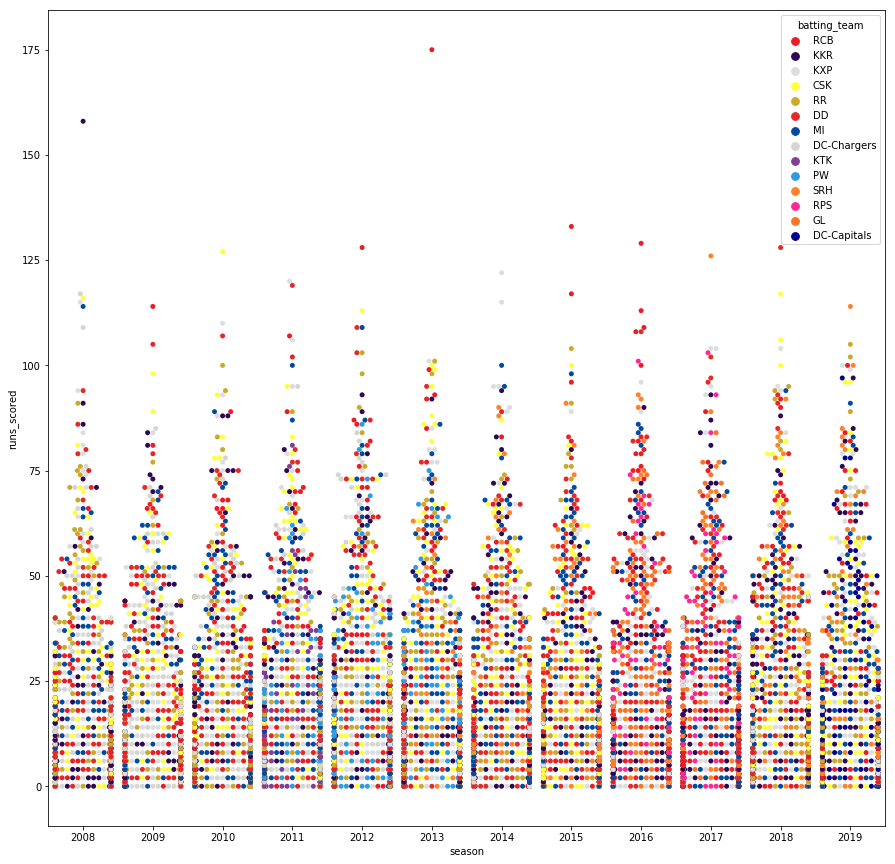

In [112]:
#plt.hist(df_batsman['runs_scored'])
plt.figure(figsize=(15,15))
sns.swarmplot(data=df_batsman,x='season',y='runs_scored',hue='batting_team');

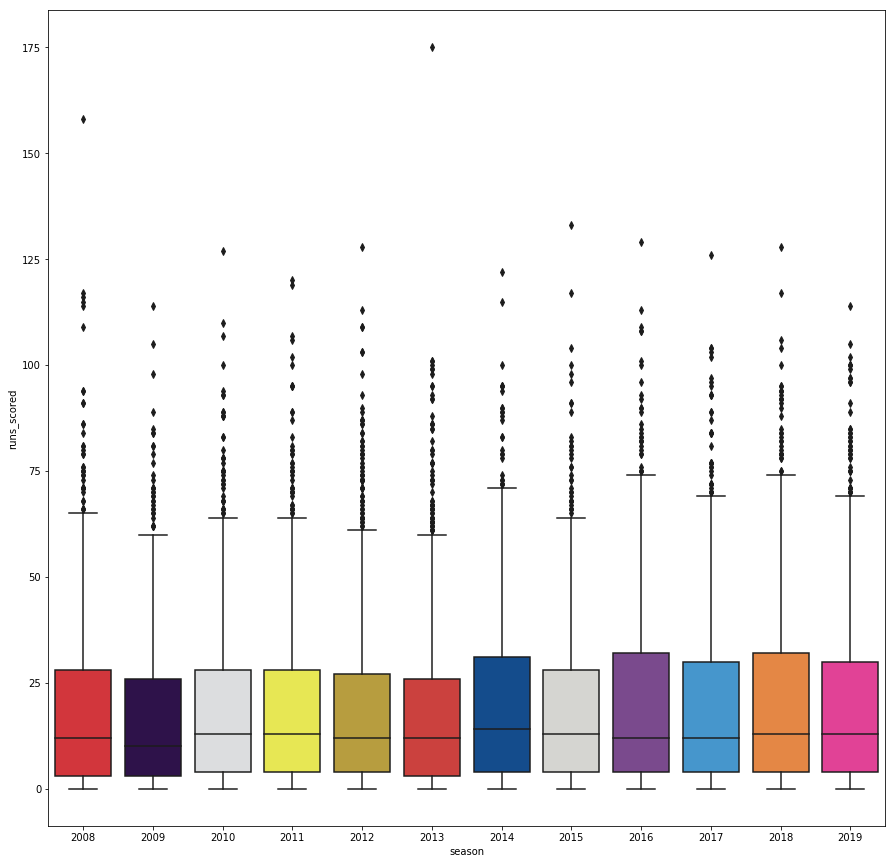

In [113]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df_batsman,x='season',y='runs_scored');

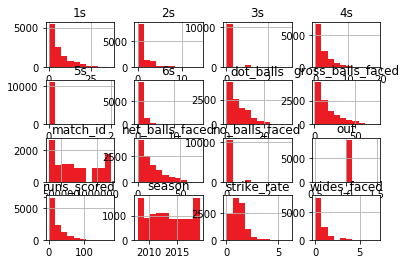

In [114]:
df_batsman.hist();

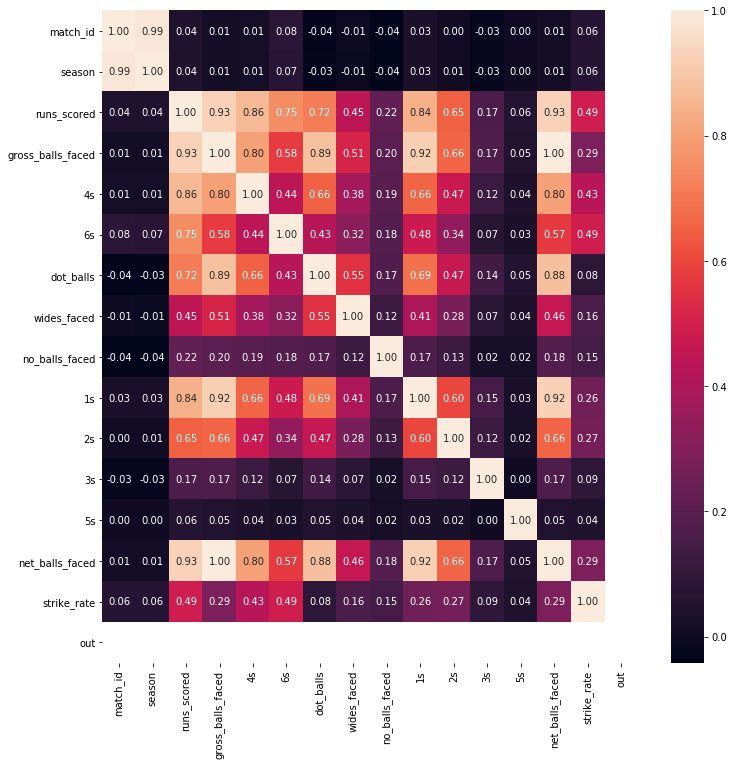

In [115]:
plt.figure(figsize=(12,12))
sns.heatmap(df_batsman.corr(),annot=True, fmt='.2f');

In [116]:
df_batsman['strike_rate'].mean()

1.111655675583413

In [0]:
df_strike_rate_by_team_by_season = df_batsman.groupby(['season','batting_team'],as_index=False)['strike_rate'].mean()

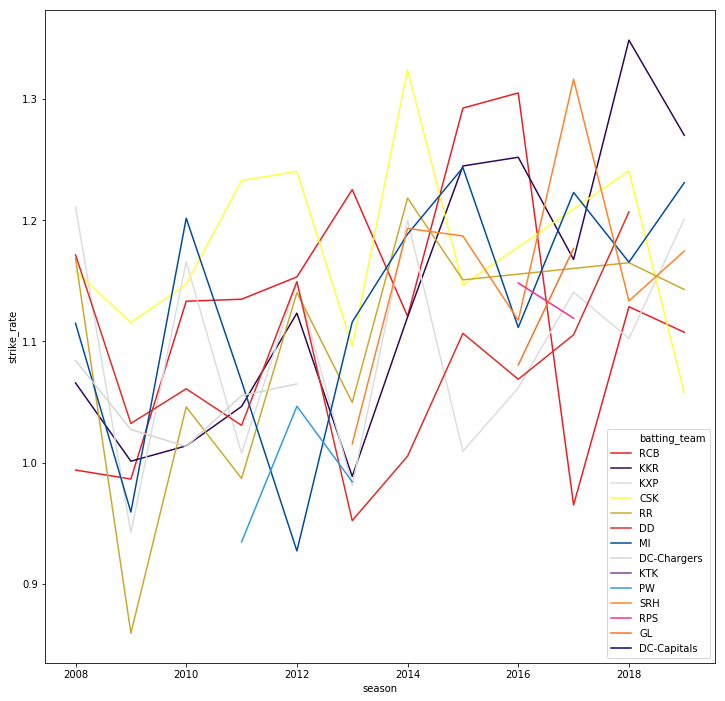

In [118]:
plt.figure(figsize=(12,12))
sns.lineplot(x='season',y='strike_rate',hue='batting_team',hue_order=list_of_teams,data=df_strike_rate_by_team_by_season);

In [119]:
list_of_seasons = list(df_batsman['season'].unique())
list_of_seasons

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [120]:
type(list_of_seasons[0])

numpy.int64

In [121]:
df_batsman[df_batsman['batting_team'] == list_of_teams[0]].head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000,inning_2,AA Noffke,1.0,RCB
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_2,B Akhil,1.0,RCB
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000,inning_2,CL White,1.0,RCB
5,335982,2008,2008-04-18,JH Kallis,8.0,7,0,1,4,0.0,0.0,2,0,0,0,7.0,1.142857,inning_2,JH Kallis,1.0,RCB
6,335982,2008,2008-04-18,MV Boucher,7.0,11,1,0,8,2.0,0.0,1,1,0,0,9.0,0.777778,inning_2,MV Boucher,1.0,RCB


In [0]:
team_batsman_performances = []


for team in list_of_teams:
  team_batsman_performances.append(df_batsman[df_batsman['batting_team'] == team])





In [0]:
team_batsman_seasonal_performances = []

for season in list_of_seasons:
  for team in list_of_teams:
    team_batsman_seasonal_performances.append(df_batsman[(df_batsman['batting_team'] == team) & (df_batsman['season'] == season)])

In [124]:
team_batsman_seasonal_performances[5].tail()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team
840,336038,2008,2008-05-30,Mohammad Asif,3.0,5,0,0,2,0.0,0.0,3,0,0,0,5.0,0.600000,inning_2,Mohammad Asif,1.0,DD
842,336038,2008,2008-05-30,S Dhawan,5.0,13,0,0,8,1.0,0.0,5,0,0,0,12.0,0.416667,inning_2,S Dhawan,1.0,DD
848,336038,2008,2008-05-30,TM Dilshan,33.0,22,5,1,10,0.0,0.0,5,1,0,0,22.0,1.500000,inning_2,TM Dilshan,1.0,DD
849,336038,2008,2008-05-30,V Sehwag,3.0,4,0,0,1,0.0,0.0,3,0,0,0,4.0,0.750000,inning_2,V Sehwag,1.0,DD
850,336038,2008,2008-05-30,VY Mahesh,3.0,10,0,0,7,0.0,0.0,3,0,0,0,10.0,0.300000,inning_2,VY Mahesh,1.0,DD


In [0]:
team_strikes = [x['strike_rate'].mean() for x in team_batsman_seasonal_performances]

In [126]:
team_strikes

[0.9938570198511288,
 1.0657629610927548,
 1.2109599511716784,
 1.1580949970758372,
 1.1683079749937493,
 1.1714843352447364,
 1.1149589328052831,
 1.0842370115110282,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9864074131335308,
 1.0011409804091205,
 0.9422249399462752,
 1.1155598277145788,
 0.8592260262182071,
 1.0323142517443327,
 0.9591638722825399,
 1.0272829412332354,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.1332117577497907,
 1.0138120591634108,
 1.1656597811055383,
 1.1472134342234772,
 1.0459539612127977,
 1.0609311996473332,
 1.2017122305455492,
 1.0133240613418948,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.134851147236522,
 1.0463296211287358,
 1.007623743267041,
 1.2328253690792672,
 0.9869483483886005,
 1.0307292359534546,
 1.0671160794662942,
 1.0552693460024456,
 0.9573529840704127,
 0.9345280822680746,
 nan,
 nan,
 nan,
 nan,
 1.1532641925816454,
 1.1233568368804936,
 1.14895678743145,
 1.2403425837247373,
 1.1403818489467668,
 1.149388639708597,
 0.9270914279377219,
 1.064947665

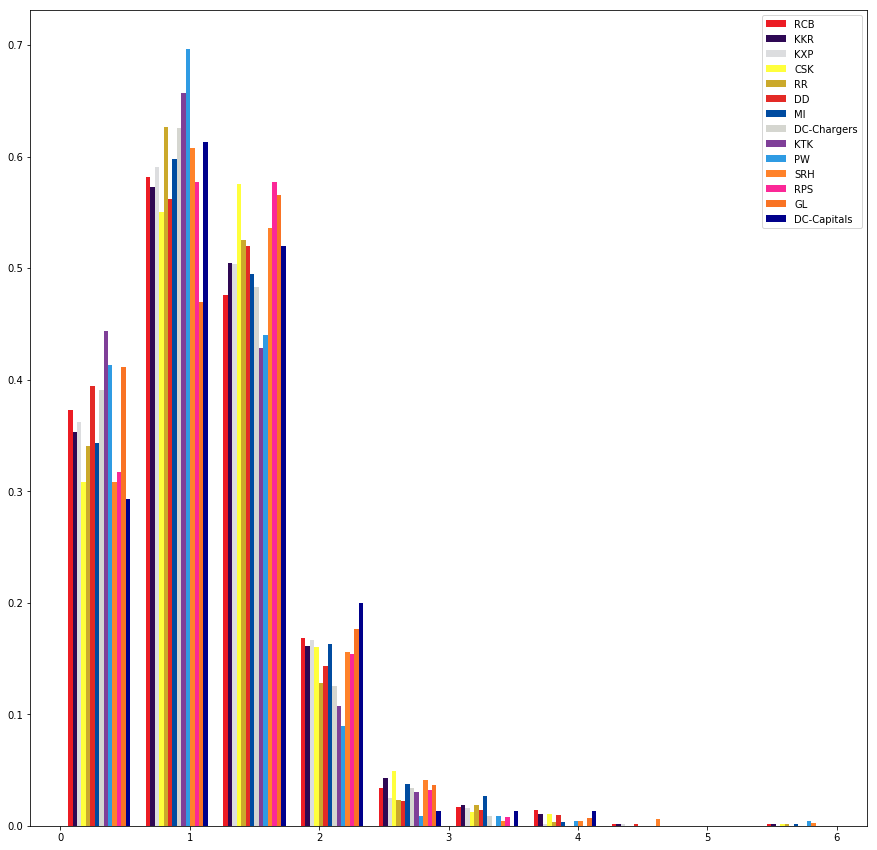

In [127]:
plt.figure(figsize=(15,15))
plt.hist([x['strike_rate'] for x in team_batsman_performances], density=1, histtype='bar',label=[x for x in list_of_teams]);
plt.legend()

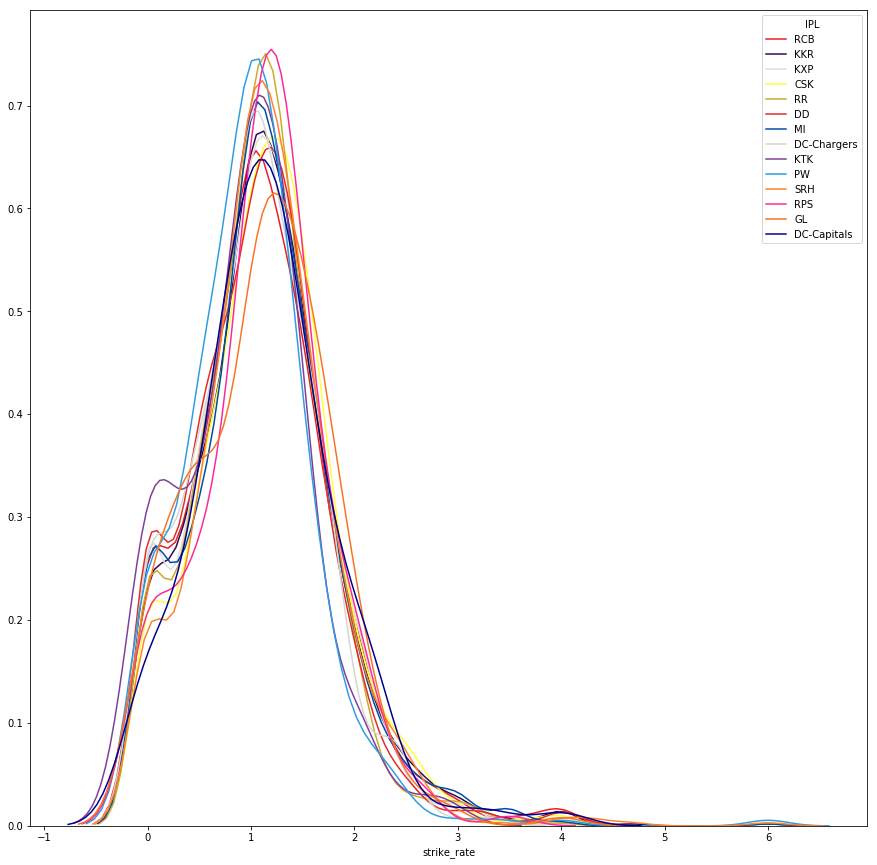

In [128]:
plt.figure(figsize=(15,15))
for i in range(len(list_of_teams)):
  g = sns.distplot(team_batsman_performances[i]['strike_rate'],rug=False,hist=False,label=list_of_teams[i])

plt.legend(title='IPL', loc='upper right')
plt.show(g)


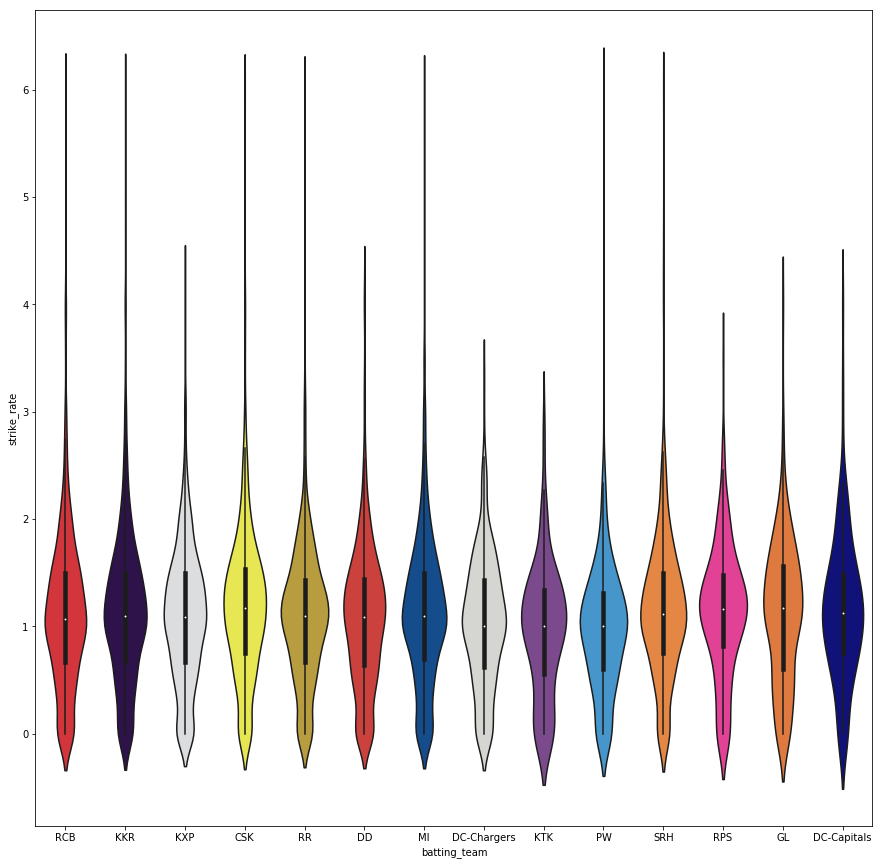

In [129]:
plt.figure(figsize=(15,15))



sns.violinplot(data=df_batsman, x='batting_team',y='strike_rate');

#plt.legend(title='IPL', loc='upper right')
#plt.show(x)





In [130]:
list_of_teams

['RCB',
 'KKR',
 'KXP',
 'CSK',
 'RR',
 'DD',
 'MI',
 'DC-Chargers',
 'KTK',
 'PW',
 'SRH',
 'RPS',
 'GL',
 'DC-Capitals']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


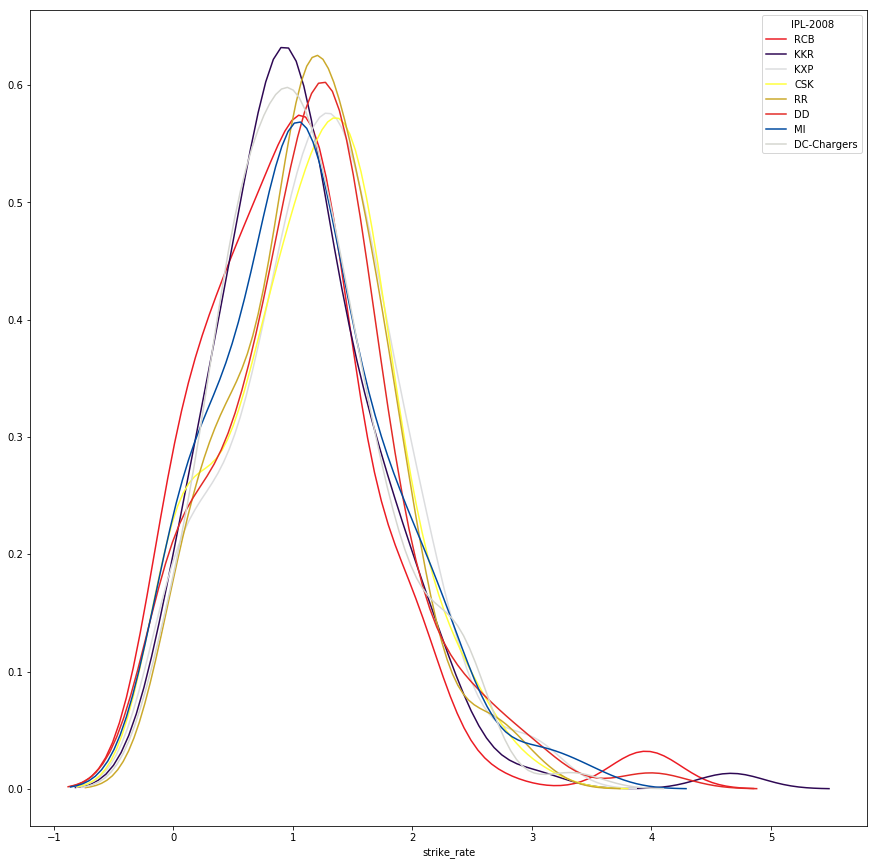

In [131]:
plt.figure(figsize=(15,15))
for i in range(len(list_of_teams)):
  g = sns.distplot(team_batsman_seasonal_performances[i]['strike_rate'],rug=False,hist=False,label=list_of_teams[i])

plt.legend(title='IPL-2008', loc='upper right')
plt.show(g)

## Runs being scored by season

In [0]:
#plt.plot(df_combined.groupby(['season'])['total'].sum())

## Runs by innings by season

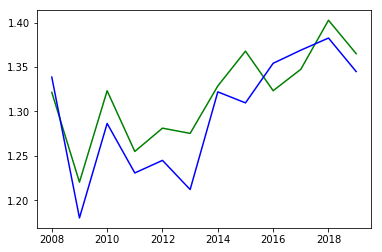

In [133]:
plt.plot(df_combined.query('level_0 == "inning_1"').groupby(['season'])['total'].mean(),color='green')
plt.plot(df_combined.query('level_0 == "inning_2"').groupby(['season'])['total'].mean(),color='blue')
plt.show()


## Highest run scorer

In [134]:
pd.DataFrame(df_combined[['season','batsman','match_id','batsman_runs']].groupby(['season','batsman','match_id'])['batsman_runs'].sum()).sort_values(by = ['batsman_runs','season'], ascending = [False, True])

,,,batsman_runs
season,batsman,match_id,
2013,CH Gayle,598027,175.0
2008,BB McCullum,335982,158.0
2015,AB de Villiers,829795,133.0
2016,AB de Villiers,980987,129.0
2012,CH Gayle,548372,128.0
2018,RR Pant,1136602,128.0
2010,M Vijay,419137,127.0
2017,DA Warner,1082627,126.0
2014,V Sehwag,734047,122.0


In [135]:
df_batsman.head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000,inning_2,AA Noffke,1.0,RCB
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_2,B Akhil,1.0,RCB
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384,NaN,NaN,NaN,KKR
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000,inning_2,CL White,1.0,RCB
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000,inning_1,DJ Hussey,1.0,KKR


In [0]:
def flag_200s(row):
  if row['runs_scored'] >= 200:
    value = 1
  else:
    value = 0
  return value

def flag_100s(row):
  if (row['runs_scored'] >= 100) & (row['runs_scored'] < 200):
    value = 1
  else:
    value = 0
  return value

def flag_50s(row):
  if (row['runs_scored'] >= 50) & (row['runs_scored'] < 100):
    value = 1
  else:
    value = 0
  return value

def flag_30s(row):
  if (row['runs_scored'] >= 30) & (row['runs_scored'] < 50):
    value = 1
  else:
    value = 0
  return value


In [0]:
df_batsman['200s'] = df_batsman.apply(lambda row: flag_200s(row),axis=1)
df_batsman['100s'] = df_batsman.apply(lambda row: flag_100s(row),axis=1)
df_batsman['50s'] = df_batsman.apply(lambda row: flag_50s(row),axis=1)
df_batsman['30s'] = df_batsman.apply(lambda row: flag_30s(row),axis=1)

In [0]:
def calc_boundary_hit_rate(row):
  if row['gross_balls_faced'] != 0:
    value = (row['6s']+row['5s']+row['4s'])/row['gross_balls_faced']
  else:
    value = 0
  return value

def calc_farming_rate(row):
  if row['gross_balls_faced'] != 0:
    value = (row['3s']+row['2s']+row['1s'])/row['gross_balls_faced']
  else:
    value = 0
  return value

def calc_dot_ball_rate(row):
  if row['gross_balls_faced'] != 0:
    value = (row['dot_balls'])/row['gross_balls_faced']
  else:
    value = 0
  return value


In [0]:
df_batsman['boundary_hit_rate'] = df_batsman.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman['farming_rate'] = df_batsman.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman['dot_rate'] = df_batsman.apply(lambda row: calc_dot_ball_rate(row),axis=1)

In [140]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11141 entries, 0 to 11140
Data columns (total 28 columns):
match_id             11141 non-null int64
season               11141 non-null int64
match_date           11141 non-null datetime64[ns]
batsman              11141 non-null object
runs_scored          11141 non-null float64
gross_balls_faced    11141 non-null int64
4s                   11141 non-null int64
6s                   11141 non-null int64
dot_balls            11141 non-null int64
wides_faced          11141 non-null float64
no_balls_faced       11141 non-null float64
1s                   11141 non-null int64
2s                   11141 non-null int64
3s                   11141 non-null int64
5s                   11141 non-null int64
net_balls_faced      11141 non-null float64
strike_rate          11141 non-null float64
level_0              8663 non-null object
player_out           8663 non-null object
out                  8663 non-null float64
batting_team         11141 non

In [141]:
df_batsman.tail()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
11136,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429,inning_1,RG Sharma,1.0,MI,0,0,0,0,0.142857,0.285714,0.571429
11137,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353,inning_1,SA Yadav,1.0,MI,0,0,0,0,0.058824,0.588235,0.352941
11138,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429,inning_2,SK Raina,1.0,CSK,0,0,0,0,0.000000,0.466667,0.533333
11139,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000,inning_2,SN Thakur,1.0,CSK,0,0,0,0,0.000000,0.500000,0.500000
11140,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932,inning_2,SR Watson,1.0,CSK,0,0,1,0,0.193548,0.322581,0.483871


In [142]:
df_batsman[['season','batsman','runs_scored','net_balls_faced','100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls','strike_rate']].sort_values(by=['runs_scored'],ascending=False).head(10)

,season,batsman,runs_scored,net_balls_faced,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,strike_rate
5233,2013,CH Gayle,175.0,65.0,1,0,0,17,0,13,0,0,21,18,2.692308
2,2008,BB McCullum,158.0,73.0,1,0,0,13,0,10,0,9,22,23,2.164384
7426,2015,AB de Villiers,133.0,58.0,1,0,0,4,0,19,0,7,19,12,2.293103
8257,2016,AB de Villiers,129.0,51.0,1,0,0,12,0,10,0,1,15,15,2.529412
10025,2018,RR Pant,128.0,63.0,1,0,0,7,0,15,0,2,22,18,2.031746
4652,2012,CH Gayle,128.0,61.0,1,0,0,13,0,7,0,1,20,21,2.098361
2202,2010,M Vijay,127.0,56.0,1,0,0,11,1,8,0,2,20,15,2.267857
9022,2017,DA Warner,126.0,59.0,1,0,0,8,0,10,2,7,18,15,2.135593
6768,2014,V Sehwag,122.0,57.0,1,0,0,8,0,12,0,2,22,18,2.140351
2753,2011,PC Valthaty,120.0,63.0,1,0,0,2,0,19,0,5,22,16,1.904762


In [0]:
def calc_batting_strike_rate(row):
  if row['net_balls_faced'] != 0:
    value = row['runs_scored']/row['net_balls_faced']
  else:
    value = 0
  return value

def calc_batting_avg(row):
  if row['out'] != 0:
    value = row['runs_scored']/row['out']
  else:
    value = 0
  return value

def calc_balls_per_inning(row):
  if row['out'] != 0:
    value = row['net_balls_faced']/row['out']
  else:
    value = 0
  return value

In [0]:
df_batsman_seasonal_stats = df_batsman[['season','batsman','runs_scored','gross_balls_faced','net_balls_faced',\
                                        'out','100s','50s','30s','6s','5s','4s','3s','2s',\
                                        '1s','dot_balls','strike_rate']].groupby(['season','batsman'],as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                                                          '100s','50s','30s','6s','5s','4s','3s',\
                                                                                          '2s','1s','dot_balls'].sum()

In [145]:
df_batsman_seasonal_stats.head(10)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls
0,2008,A Chopra,42.0,55,52.0,5.0,0,0,0,0,0,5,0,2,18,30
1,2008,A Kumble,13.0,17,17.0,2.0,0,0,0,0,0,1,0,1,7,8
2,2008,A Mishra,37.0,42,42.0,3.0,0,0,1,0,0,3,0,2,21,16
3,2008,A Mukund,0.0,1,1.0,1.0,0,0,0,0,0,0,0,0,0,1
4,2008,A Nehra,3.0,13,12.0,1.0,0,0,0,0,0,0,0,0,3,10
5,2008,A Symonds,161.0,111,104.0,2.0,1,0,1,9,0,15,1,5,34,47
6,2008,AA Noffke,9.0,12,10.0,1.0,0,0,0,0,0,1,0,0,5,6
7,2008,AB Agarkar,54.0,49,45.0,5.0,0,0,0,2,0,5,0,4,14,24
8,2008,AB Dinda,2.0,4,4.0,1.0,0,0,0,0,0,0,0,0,2,2
9,2008,AB de Villiers,95.0,100,98.0,5.0,0,0,0,1,0,5,0,16,37,41


In [146]:
df_batsman_seasonal_stats['season_strike_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_batsman_seasonal_stats['season_batting_avg'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_avg(row),axis=1)
df_batsman_seasonal_stats['balls_per_inning'] = df_batsman_seasonal_stats.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_batsman_seasonal_stats['boundary_hit_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman_seasonal_stats['farming_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman_seasonal_stats['dot_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_batsman_seasonal_stats.head()


,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,2008,A Chopra,42.0,55,52.0,5.0,0,0,0,0,0,5,0,2,18,30,0.807692,8.400000,10.4,0.090909,0.363636,0.545455
1,2008,A Kumble,13.0,17,17.0,2.0,0,0,0,0,0,1,0,1,7,8,0.764706,6.500000,8.5,0.058824,0.470588,0.470588
2,2008,A Mishra,37.0,42,42.0,3.0,0,0,1,0,0,3,0,2,21,16,0.880952,12.333333,14.0,0.071429,0.547619,0.380952
3,2008,A Mukund,0.0,1,1.0,1.0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000000,1.0,0.000000,0.000000,1.000000
4,2008,A Nehra,3.0,13,12.0,1.0,0,0,0,0,0,0,0,0,3,10,0.250000,3.000000,12.0,0.000000,0.230769,0.769231


In [147]:
df_batsman_seasonal_stats.sort_values(by=['season_batting_avg','season_strike_rate','balls_per_inning'],ascending=False).head(20)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
60,2008,LA Pomersbach,152.0,101,99.0,1.0,0,1,1,9,0,13,0,3,40,36,1.535354,152.000000,99.000000,0.217822,0.425743,0.356436
119,2008,SM Katich,96.0,72,68.0,1.0,0,1,0,2,0,11,1,8,21,29,1.411765,96.000000,68.000000,0.180556,0.416667,0.402778
1168,2015,JA Morkel,86.0,70,65.0,1.0,0,1,0,2,0,9,0,5,28,26,1.323077,86.000000,65.000000,0.157143,0.471429,0.371429
70,2008,MEK Hussey,168.0,100,100.0,2.0,1,0,1,11,0,12,0,8,38,31,1.680000,84.000000,50.000000,0.230000,0.460000,0.310000
227,2009,MK Pandey,168.0,120,117.0,2.0,1,0,1,4,0,17,0,18,40,41,1.435897,84.000000,58.500000,0.175000,0.483333,0.341667
1743,2019,MS Dhoni,416.0,317,305.0,5.0,0,3,4,23,0,22,0,35,120,117,1.363934,83.200000,61.000000,0.141956,0.488959,0.369085
723,2012,JP Duminy,244.0,195,190.0,3.0,0,2,0,11,0,13,0,17,92,62,1.284211,81.333333,63.333333,0.123077,0.558974,0.317949
1379,2016,V Kohli,973.0,655,637.0,12.0,4,7,1,38,0,84,2,56,291,184,1.527473,81.083333,53.083333,0.186260,0.532824,0.280916
5,2008,A Symonds,161.0,111,104.0,2.0,1,0,1,9,0,15,1,5,34,47,1.548077,80.500000,52.000000,0.216216,0.360360,0.423423
1607,2018,MS Dhoni,455.0,321,301.0,6.0,0,3,3,30,0,24,2,18,137,110,1.511628,75.833333,50.166667,0.168224,0.489097,0.342679


In [148]:
df_batsman_seasonal_stats.query('batsman=="MS Dhoni"')

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
76,2008,MS Dhoni,414.0,319,310.0,10.0,0,2,6,15,0,38,2,26,114,124,1.335484,41.400000,31.000000,0.166144,0.445141,0.388715
232,2009,MS Dhoni,332.0,270,261.0,8.0,0,2,2,9,0,22,1,24,139,75,1.272031,41.500000,32.625000,0.114815,0.607407,0.277778
397,2010,MS Dhoni,287.0,215,210.0,9.0,0,2,3,8,0,26,0,20,95,66,1.366667,31.888889,23.333333,0.158140,0.534884,0.306977
565,2011,MS Dhoni,392.0,247,245.0,9.0,0,2,2,23,0,25,1,22,107,69,1.600000,43.555556,27.222222,0.194332,0.526316,0.279352
749,2012,MS Dhoni,357.0,283,275.0,12.0,0,1,3,9,0,26,1,37,122,88,1.298182,29.750000,22.916667,0.123675,0.565371,0.310954
915,2013,MS Dhoni,461.0,298,280.0,11.0,0,4,3,25,0,32,3,30,114,94,1.646429,41.909091,25.454545,0.191275,0.493289,0.315436
1062,2014,MS Dhoni,371.0,258,247.0,5.0,0,1,3,20,0,22,2,28,101,85,1.502024,74.200000,49.400000,0.162791,0.507752,0.329457
1193,2015,MS Dhoni,372.0,309,305.0,12.0,0,1,4,17,0,27,0,24,114,127,1.219672,31.000000,25.416667,0.142395,0.446602,0.411003
1328,2016,MS Dhoni,284.0,220,210.0,7.0,0,1,3,14,0,18,1,20,85,82,1.352381,40.571429,30.000000,0.145455,0.481818,0.372727
1466,2017,MS Dhoni,290.0,261,250.0,11.0,0,1,2,16,0,15,0,20,94,116,1.160000,26.363636,22.727273,0.118774,0.436782,0.444444


In [0]:
df_mvp = pd.DataFrame(df_batsman_seasonal_stats.\
                      groupby('batsman',as_index=False)\
                      ['runs_scored','gross_balls_faced','net_balls_faced','out',\
                       '100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls']\
                      .sum()\
                      .sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False)['batsman']\
                      .head(10)\
                      .reset_index(drop=True))



In [150]:
list(df_mvp['batsman'])


['SK Raina',
 'V Kohli',
 'RG Sharma',
 'DA Warner',
 'S Dhawan',
 'MS Dhoni',
 'CH Gayle',
 'RV Uthappa',
 'AB de Villiers',
 'G Gambhir']

In [151]:
df_mvp

,batsman
0,SK Raina
1,V Kohli
2,RG Sharma
3,DA Warner
4,S Dhawan
5,MS Dhoni
6,CH Gayle
7,RV Uthappa
8,AB de Villiers
9,G Gambhir


In [0]:
mvp_list = df_mvp['batsman']

In [153]:
len(mvp_list)

10

In [0]:
df_mvp_comparison = df_batsman_seasonal_stats.groupby('batsman',as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                            '100s','50s','30s','6s','5s','4s','3s',\
                                                            '2s','1s','dot_balls'].sum().query('batsman in @mvp_list') 



In [155]:
df_mvp_comparison['ipl_strike_rate'] = df_mvp_comparison.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_mvp_comparison['ipl_batting_avg'] = df_mvp_comparison.apply(lambda row: calc_batting_avg(row),axis=1)
df_mvp_comparison['ipl_balls_per_inning'] = df_mvp_comparison.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_mvp_comparison['boundary_hit_rate'] = df_mvp_comparison.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_mvp_comparison['farming_rate'] = df_mvp_comparison.apply(lambda row: calc_farming_rate(row),axis=1)
df_mvp_comparison['dot_rate'] = df_mvp_comparison.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_mvp_comparison = df_mvp_comparison.sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False).reset_index(drop=True)

df_mvp_comparison

,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,ipl_strike_rate,ipl_batting_avg,ipl_balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,SK Raina,5352.0,4025,3881.0,159.0,1,38,37,193,1,493,11,264,1656,1407,1.379026,33.660377,24.408805,0.170683,0.479752,0.349565
1,V Kohli,5301.0,4112,4003.0,141.0,5,35,35,189,0,469,10,285,1691,1468,1.324257,37.595745,28.390071,0.160019,0.482977,0.357004
2,RG Sharma,4869.0,3784,3700.0,152.0,1,36,31,195,1,426,5,204,1567,1386,1.315946,32.032895,24.342105,0.164376,0.469345,0.366279
3,DA Warner,4691.0,3383,3276.0,108.0,4,44,19,181,1,455,17,270,1189,1270,1.431929,43.435185,30.333333,0.188294,0.436299,0.375406
4,S Dhawan,4563.0,3767,3649.0,137.0,0,37,26,95,2,522,18,201,1439,1490,1.250480,33.306569,26.635036,0.164322,0.440138,0.395540
5,MS Dhoni,4431.0,3318,3199.0,105.0,0,23,38,209,0,297,13,304,1342,1153,1.385120,42.200000,30.466667,0.152502,0.500000,0.347498
6,CH Gayle,4429.0,3068,2910.0,106.0,6,28,20,320,0,367,3,79,874,1425,1.521993,41.783019,27.452830,0.223924,0.311604,0.464472
7,RV Uthappa,4400.0,3481,3357.0,151.0,0,24,40,156,3,433,13,205,1268,1403,1.310694,29.139073,22.231788,0.170066,0.426889,0.403045
8,AB de Villiers,4356.0,2940,2866.0,109.0,3,33,19,211,0,354,15,216,1197,947,1.519888,39.963303,26.293578,0.192177,0.485714,0.322109
9,G Gambhir,4172.0,3479,3350.0,134.0,0,36,21,59,0,488,14,245,1334,1339,1.245373,31.134328,25.000000,0.157229,0.457890,0.384881


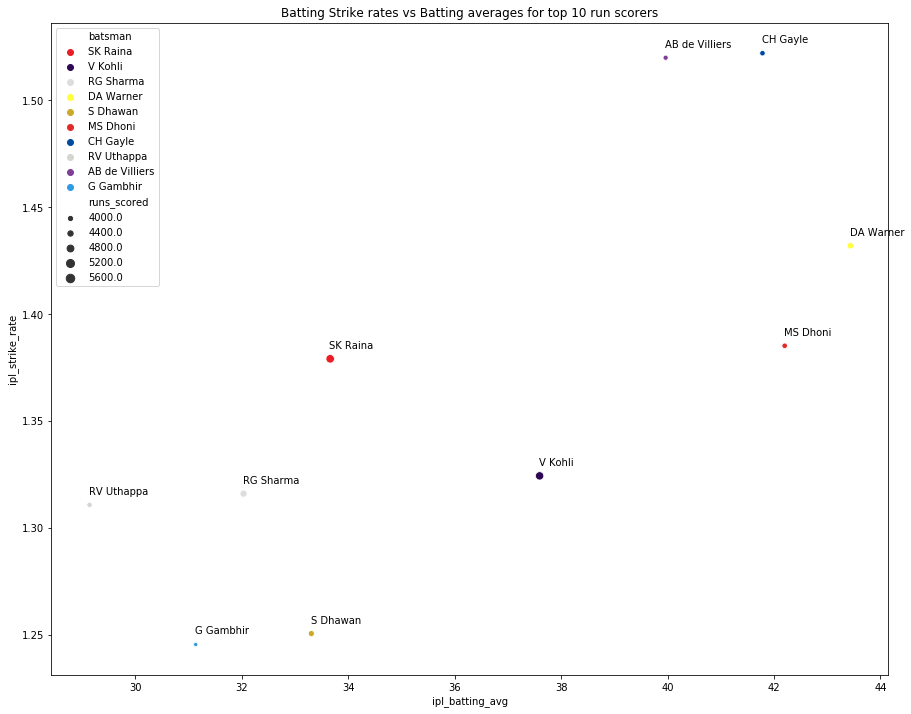

In [156]:
plt.figure(figsize=(15,12))
p1 = sns.scatterplot(x="ipl_batting_avg", y="ipl_strike_rate",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p1.text(df_mvp_comparison.ipl_batting_avg[line]-0.015,df_mvp_comparison.ipl_strike_rate[line]+0.005,df_mvp_comparison.batsman[line])

p1.set_title('Batting Strike rates vs Batting averages for top 10 run scorers')
plt.show(p1)



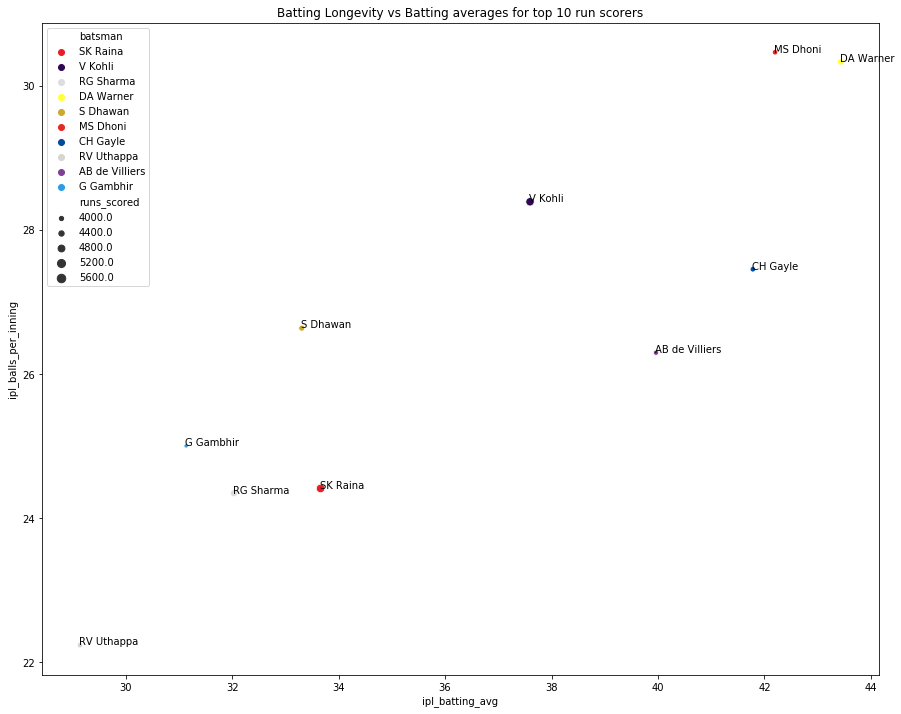

In [157]:
plt.figure(figsize=(15,12))
p2 = sns.scatterplot(x="ipl_batting_avg", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p2.text(df_mvp_comparison.ipl_batting_avg[line]-0.015,df_mvp_comparison.ipl_balls_per_inning[line]+0.005,df_mvp_comparison.batsman[line])

p2.set_title('Batting Longevity vs Batting averages for top 10 run scorers')
plt.show(p2)

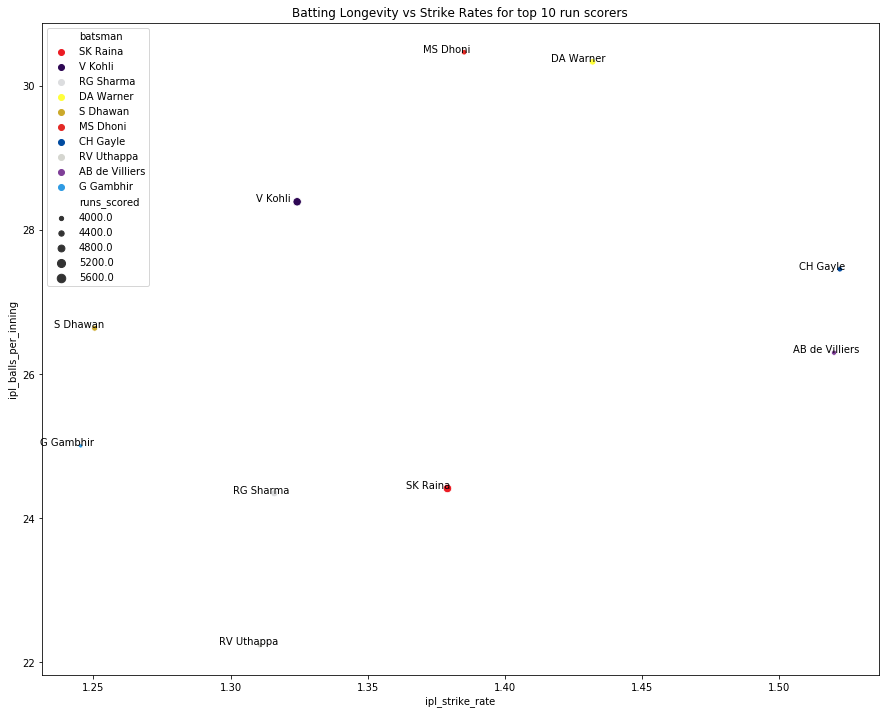

In [158]:
plt.figure(figsize=(15,12))
p3 = sns.scatterplot(x="ipl_strike_rate", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p3.text(df_mvp_comparison.ipl_strike_rate[line]-0.015,df_mvp_comparison.ipl_balls_per_inning[line]+0.005,df_mvp_comparison.batsman[line])

p3.set_title('Batting Longevity vs Strike Rates for top 10 run scorers')
plt.show(p3)

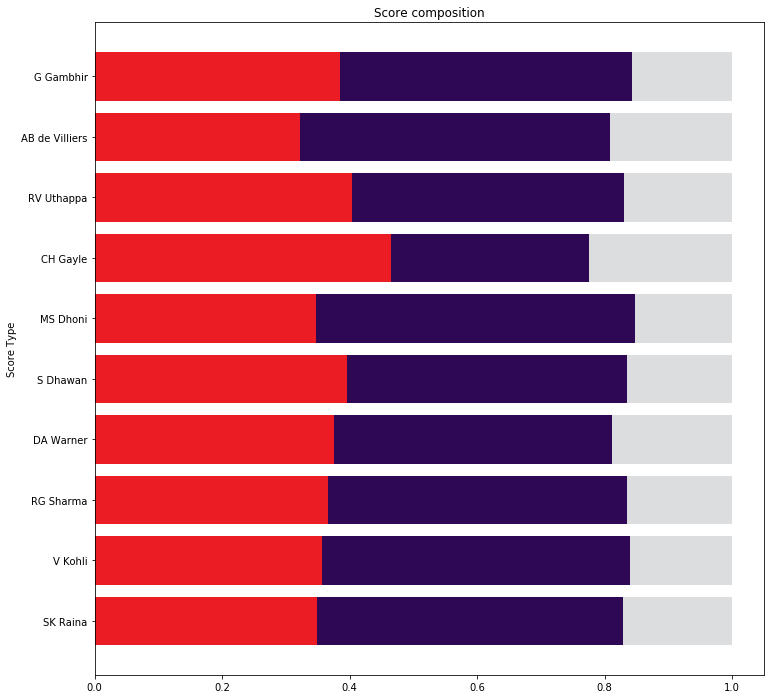

In [159]:
plt.figure(figsize=(12,12))

p4 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['dot_rate'])
p5 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['farming_rate'],left=df_mvp_comparison['dot_rate'])
p6 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['boundary_hit_rate'],left=df_mvp_comparison['dot_rate']+df_mvp_comparison['farming_rate'])



plt.ylabel('Score Type')
plt.title('Score composition')

plt.show()

In [160]:
df_mvp_comparison.ipl_batting_avg[0]

33.660377358490564

In [161]:
df_mvp_comparison.shape[0]

10

In [0]:
df_best_batsman = df_batsman.merge(df_mvp,how='right',left_on=['batsman'],right_on=['batsman'])

In [163]:
df_best_batsman.head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
0,335982,2008,2008-04-18,V Kohli,1.0,5,0,0,4,0.0,0.0,1,0,0,0,5.0,0.200000,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.000000,0.200000,0.800000
1,335985,2008,2008-04-20,V Kohli,23.0,15,3,1,6,1.0,0.0,5,0,0,0,14.0,1.642857,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.266667,0.333333,0.400000
2,335992,2008,2008-04-26,V Kohli,13.0,16,0,1,9,2.0,0.0,5,1,0,0,14.0,0.928571,inning_1,V Kohli,1.0,RCB,0,0,0,0,0.062500,0.375000,0.562500
3,335996,2008,2008-04-28,V Kohli,12.0,7,2,0,2,0.0,0.0,2,1,0,0,7.0,1.714286,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.285714,0.428571,0.285714
4,335998,2008,2008-04-30,V Kohli,1.0,1,0,0,0,0.0,0.0,1,0,0,0,1.0,1.000000,NaN,NaN,NaN,RCB,0,0,0,0,0.000000,1.000000,0.000000


Text(0.5, 1.0, 'Strike Rates by player for each inning')

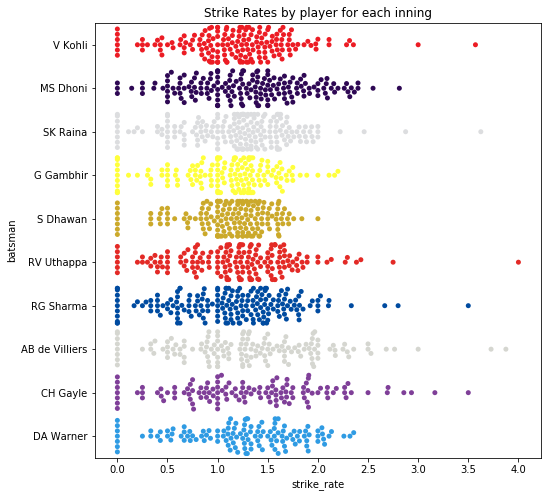

In [164]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=df_best_batsman,x='strike_rate',y='batsman').set_title('Strike Rates by player for each inning')
#sns.violinplot(data=df_best_batsman,x='strike_rate',y='batsman')

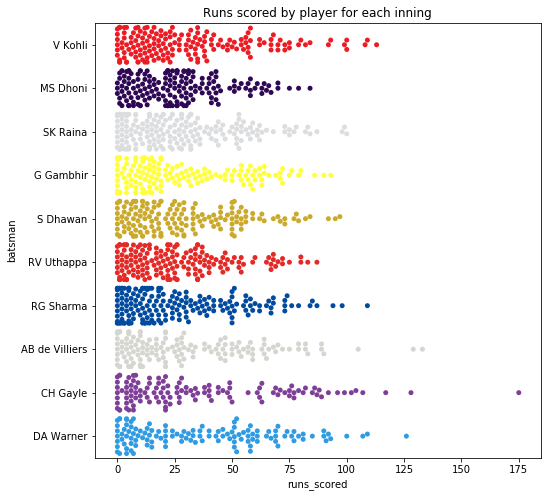

In [165]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=df_best_batsman,x='runs_scored',y='batsman').set_title('Runs scored by player for each inning');

Text(0.5, 1.0, 'Balls faced by player for each inning')

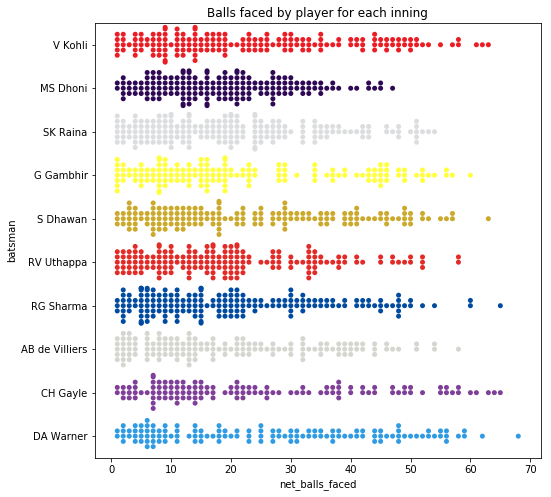

In [166]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=df_best_batsman,x='net_balls_faced',y='batsman').set_title('Balls faced by player for each inning')

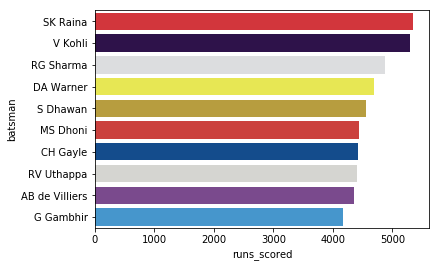

In [167]:
sns.barplot(data=df_mvp_comparison,x='runs_scored',y='batsman')

In [168]:
df_match_summary['player_of_match'].value_counts()

CH Gayle             21
AB de Villiers       20
MS Dhoni             17
RG Sharma            17
DA Warner            17
YK Pathan            16
SR Watson            15
SK Raina             14
G Gambhir            13
MEK Hussey           12
V Kohli              12
AM Rahane            12
AD Russell           11
A Mishra             11
V Sehwag             11
DR Smith             11
JH Kallis            10
KA Pollard           10
AT Rayudu             9
SP Narine             9
SE Marsh              9
SR Tendulkar          8
UT Yadav              8
RA Jadeja             8
Harbhajan Singh       8
Rashid Khan           7
RV Uthappa            7
AC Gilchrist          7
SL Malinga            6
BJ Hodge              6
                     ..
Mustafizur Rahman     1
Mohammed Siraj        1
TG Southee            1
S Aravind             1
NV Ojha               1
S Sreesanth           1
JJ Roy                1
Shubman Gill          1
AD Mascarenhas        1
RJ Harris             1
LJ Wright       

In [169]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 51 columns):
0_extras                      0 non-null float64
batsman                       176702 non-null object
batsman_runs                  176702 non-null float64
batting_team                  176711 non-null object
bowler                        176702 non-null object
byes                          476 non-null float64
extras_runs                   176061 non-null float64
kind                          8702 non-null object
legbyes                       2897 non-null float64
level_0                       176711 non-null object
level_1                       176711 non-null object
match_id                      176711 non-null int64
noballs                       702 non-null float64
non_striker                   176702 non-null object
player_out                    8702 non-null object
total                         176702 non-null float64
wides                         5337 non-null float64


In [218]:
df_details.head()

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
0,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
1,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
3,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [230]:
df_details.query('match_id==335982' ).groupby(['level_0','inning_quarter'],as_index=False)['total','batsman_runs','extras_runs','byes','legbyes','wides','noballs'].sum()

,level_0,inning_quarter,total,batsman_runs,extras_runs,byes,legbyes,wides,noballs
0,inning_1,Q1,60.0,50.0,10.0,0.0,4.0,6.0,0.0
1,inning_1,Q2,27.0,27.0,0.0,0.0,0.0,0.0,0.0
2,inning_1,Q3,67.0,60.0,7.0,4.0,0.0,3.0,0.0
3,inning_1,Q4,68.0,68.0,0.0,0.0,0.0,0.0,0.0
4,inning_2,Q1,24.0,17.0,7.0,0.0,5.0,2.0,0.0
5,inning_2,Q2,27.0,20.0,7.0,0.0,2.0,5.0,0.0
6,inning_2,Q3,30.0,26.0,4.0,0.0,1.0,3.0,0.0
7,inning_2,Q4,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [0]:
df_inning_wise = df_details[['match_id','level_0','inning_quarter',\
                             'player_out','batsman_runs','total','6_flag','4_flag',\
                             'dot_ball_flag','delivery','wides','noballs']].groupby(['match_id',\
                                                                             'level_0',\
                                                                             'inning_quarter'],as_index=False)['batsman_runs','total','player_out','delivery',\
                                                                                                               'wides','noballs','6_flag',\
                                                                                                               '4_flag','dot_ball_flag'].agg({'batsman_runs':'sum','total':'sum',\
                                                                                                               'player_out':'count','delivery':'count',\
                                                                                                               'wides':'sum','noballs':'sum',\
                                                                                                               '6_flag':'count','4_flag':'count',\
                                                                                                               'dot_ball_flag':'count'})



In [222]:
df_inning_wise.head()

,match_id,level_0,inning_quarter,batsman_runs,total,player_out,delivery,wides,noballs,6_flag,4_flag,dot_ball_flag
0,335982,inning_1,Q1,50.0,60.0,0,32,6.0,0.0,3,7,18
1,335982,inning_1,Q2,27.0,27.0,1,30,0.0,0.0,1,0,10
2,335982,inning_1,Q3,60.0,67.0,1,32,3.0,0.0,4,5,10
3,335982,inning_1,Q4,68.0,68.0,1,30,0.0,0.0,6,3,7
4,335982,inning_2,Q1,17.0,24.0,3,32,2.0,0.0,1,0,21


In [171]:
df_inning_wise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5852 entries, 0 to 5851
Data columns (total 12 columns):
match_id          5852 non-null int64
level_0           5852 non-null object
inning_quarter    5852 non-null object
batsman_runs      5852 non-null float64
total             5852 non-null float64
player_out        5852 non-null int64
delivery          5852 non-null int64
wide_flag         5852 non-null int64
noball_flag       5852 non-null int64
6_flag            5852 non-null int64
4_flag            5852 non-null int64
dot_ball_flag     5852 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 594.3+ KB


In [0]:
df_unstacked = df_inning_wise.set_index(\
                                        ['match_id','inning_quarter','level_0']\
                                        ).unstack().unstack()



In [232]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 335982 to 1181768
Data columns (total 72 columns):
(batsman_runs, inning_1, Q1)     747 non-null float64
(batsman_runs, inning_1, Q2)     746 non-null float64
(batsman_runs, inning_1, Q3)     743 non-null float64
(batsman_runs, inning_1, Q4)     735 non-null float64
(batsman_runs, inning_2, Q1)     745 non-null float64
(batsman_runs, inning_2, Q2)     740 non-null float64
(batsman_runs, inning_2, Q3)     725 non-null float64
(batsman_runs, inning_2, Q4)     671 non-null float64
(total, inning_1, Q1)            747 non-null float64
(total, inning_1, Q2)            746 non-null float64
(total, inning_1, Q3)            743 non-null float64
(total, inning_1, Q4)            735 non-null float64
(total, inning_2, Q1)            745 non-null float64
(total, inning_2, Q2)            740 non-null float64
(total, inning_2, Q3)            725 non-null float64
(total, inning_2, Q4)            671 non-null float64
(player_out, inning_1,

In [233]:
df_unstacked.columns.names

FrozenList([None, 'level_0', 'inning_quarter'])

In [234]:
df_unstacked.columns.values

array([('batsman_runs', 'inning_1', 'Q1'),
       ('batsman_runs', 'inning_1', 'Q2'),
       ('batsman_runs', 'inning_1', 'Q3'),
       ('batsman_runs', 'inning_1', 'Q4'),
       ('batsman_runs', 'inning_2', 'Q1'),
       ('batsman_runs', 'inning_2', 'Q2'),
       ('batsman_runs', 'inning_2', 'Q3'),
       ('batsman_runs', 'inning_2', 'Q4'), ('total', 'inning_1', 'Q1'),
       ('total', 'inning_1', 'Q2'), ('total', 'inning_1', 'Q3'),
       ('total', 'inning_1', 'Q4'), ('total', 'inning_2', 'Q1'),
       ('total', 'inning_2', 'Q2'), ('total', 'inning_2', 'Q3'),
       ('total', 'inning_2', 'Q4'), ('player_out', 'inning_1', 'Q1'),
       ('player_out', 'inning_1', 'Q2'), ('player_out', 'inning_1', 'Q3'),
       ('player_out', 'inning_1', 'Q4'), ('player_out', 'inning_2', 'Q1'),
       ('player_out', 'inning_2', 'Q2'), ('player_out', 'inning_2', 'Q3'),
       ('player_out', 'inning_2', 'Q4'), ('delivery', 'inning_1', 'Q1'),
       ('delivery', 'inning_1', 'Q2'), ('delivery', 'inning_1', 

In [0]:
df_unstacked.columns = ['_'.join(col).strip() for col in df_unstacked.columns.values]

In [236]:
df_unstacked.columns.values

array(['batsman_runs_inning_1_Q1', 'batsman_runs_inning_1_Q2',
       'batsman_runs_inning_1_Q3', 'batsman_runs_inning_1_Q4',
       'batsman_runs_inning_2_Q1', 'batsman_runs_inning_2_Q2',
       'batsman_runs_inning_2_Q3', 'batsman_runs_inning_2_Q4',
       'total_inning_1_Q1', 'total_inning_1_Q2', 'total_inning_1_Q3',
       'total_inning_1_Q4', 'total_inning_2_Q1', 'total_inning_2_Q2',
       'total_inning_2_Q3', 'total_inning_2_Q4', 'player_out_inning_1_Q1',
       'player_out_inning_1_Q2', 'player_out_inning_1_Q3',
       'player_out_inning_1_Q4', 'player_out_inning_2_Q1',
       'player_out_inning_2_Q2', 'player_out_inning_2_Q3',
       'player_out_inning_2_Q4', 'delivery_inning_1_Q1',
       'delivery_inning_1_Q2', 'delivery_inning_1_Q3',
       'delivery_inning_1_Q4', 'delivery_inning_2_Q1',
       'delivery_inning_2_Q2', 'delivery_inning_2_Q3',
       'delivery_inning_2_Q4', 'wides_inning_1_Q1', 'wides_inning_1_Q2',
       'wides_inning_1_Q3', 'wides_inning_1_Q4', 'wides_innin

In [237]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 335982 to 1181768
Data columns (total 72 columns):
batsman_runs_inning_1_Q1     747 non-null float64
batsman_runs_inning_1_Q2     746 non-null float64
batsman_runs_inning_1_Q3     743 non-null float64
batsman_runs_inning_1_Q4     735 non-null float64
batsman_runs_inning_2_Q1     745 non-null float64
batsman_runs_inning_2_Q2     740 non-null float64
batsman_runs_inning_2_Q3     725 non-null float64
batsman_runs_inning_2_Q4     671 non-null float64
total_inning_1_Q1            747 non-null float64
total_inning_1_Q2            746 non-null float64
total_inning_1_Q3            743 non-null float64
total_inning_1_Q4            735 non-null float64
total_inning_2_Q1            745 non-null float64
total_inning_2_Q2            740 non-null float64
total_inning_2_Q3            725 non-null float64
total_inning_2_Q4            671 non-null float64
player_out_inning_1_Q1       747 non-null float64
player_out_inning_1_Q2       746 non

In [238]:
df_unstacked.reset_index()

,match_id,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,player_out_inning_1_Q1,player_out_inning_1_Q2,player_out_inning_1_Q3,player_out_inning_1_Q4,player_out_inning_2_Q1,player_out_inning_2_Q2,player_out_inning_2_Q3,player_out_inning_2_Q4,delivery_inning_1_Q1,delivery_inning_1_Q2,delivery_inning_1_Q3,delivery_inning_1_Q4,delivery_inning_2_Q1,delivery_inning_2_Q2,delivery_inning_2_Q3,delivery_inning_2_Q4,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
0,335982,50.0,27.0,60.0,68.0,17.0,20.0,26.0,0.0,60.0,27.0,67.0,68.0,24.0,27.0,30.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,2.0,1.0,32.0,30.0,32.0,30.0,32.0,35.0,32.0,2.0,6.0,0.0,3.0,0.0,2.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,6.0,1.0,0.0,2.0,0.0,7.0,0.0,5.0,3.0,0.0,2.0,1.0,0.0,18.0,10.0,10.0,7.0,21.0,23.0,19.0,2.0
1,335983,39.0,46.0,70.0,79.0,47.0,59.0,51.0,39.0,42.0,46.0,73.0,79.0,47.0,63.0,55.0,42.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,32.0,30.0,32.0,30.0,30.0,33.0,31.0,30.0,1.0,0.0,2.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,1.0,3.0,4.0,1.0,8.0,3.0,4.0,5.0,7.0,6.0,3.0,2.0,18.0,10.0,7.0,4.0,10.0,7.0,9.0,7.0
2,335984,36.0,16.0,37.0,33.0,47.0,35.0,36.0,4.0,37.0,20.0,39.0,33.0,48.0,38.0,42.0,4.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,31.0,30.0,31.0,30.0,31.0,33.0,32.0,1.0,1.0,0.0,2.0,0.0,1.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,3.0,5.0,9.0,5.0,3.0,1.0,18.0,15.0,13.0,14.0,16.0,14.0,7.0,0.0
3,335985,35.0,31.0,30.0,58.0,36.0,38.0,40.0,47.0,41.0,33.0,31.0,60.0,37.0,39.0,42.0,48.0,2.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,32.0,30.0,30.0,31.0,31.0,31.0,32.0,29.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,2.0,1.0,3.0,6.0,4.0,2.0,6.0,6.0,2.0,4.0,3.0,21.0,12.0,13.0,7.0,13.0,11.0,10.0,7.0
4,335986,19.0,26.0,24.0,31.0,18.0,8.0,29.0,29.0,23.0,29.0,25.0,33.0,23.0,15.0,43.0,31.0,2.0,2.0,2.0,4.0,3.0,0.0,1.0,1.0,33.0,31.0,30.0,24.0,30.0,33.0,35.0,24.0,2.0,0.0,0.0,2.0,0.0,7.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,2.0,22.0,21.0,17.0,12.0,19.0,26.0,19.0,11.0
5,335987,38.0,41.0,33.0,50.0,41.0,37.0,53.0,25.0,38.0,44.0,33.0,51.0,48.0,39.0,55.0,26.0,1.0,3.0,0.0,4.0,3.0,0.0,1.0,0.0,30.0,31.0,30.0,31.0,36.0,31.0,32.0,20.0,0.0,2.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,2.0,1.0,1.0,3.0,2.0,2.0,3.0,0.0,6.0,5.0,3.0,4.0,5.0,4.0,5.0,3.0,20.0,13.0,12.0,12.0,22.0,16.0,12.0,7.0
6,335988,22.0,21.0,28.0,66.0,37.0,56.0,38.0,NaN,23.0,22.0,28.0,69.0,37.0,58.0,48.0,NaN,1.0,3.0,1.0,3.0,1.0,0.0,0.0,NaN,30.0,31.0,30.0,31.0,30.0,32.0,21.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,5.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,5.0,0.0,3.0,3.0,NaN,2.0,3.0,2.0,5.0,6.0,5.0,4.0,NaN,22.0,20.0,9.0,9.0,12.0,10.0,10.0,NaN
7,335989,35.0,37.0,56.0,62.0,43.0,32.0,47.0,67.0,40.0,42.0,61.0,65.0,50.0,33.0,51.0,68.0,2.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,31.0,33.0,31.0,32.0,32.0,31.0,34.0,31.0,1.0,2.0,5.0,1.0,2.0,0.0,4.0,0.0,0.0,1.0

In [180]:
df_match_summary.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 548336 to 501226
Data columns (total 24 columns):
city               743 non-null object
competition        756 non-null object
toss_decision      756 non-null object
eliminator         9 non-null object
gender             756 non-null object
match_type         756 non-null object
method             19 non-null object
neutral_venue      77 non-null float64
overs              756 non-null int64
player_of_match    752 non-null object
result             13 non-null object
venue              756 non-null object
winner             756 non-null object
winner_toss        743 non-null object
won_by_runs        337 non-null float64
won_by_wickets     406 non-null float64
match_date         756 non-null datetime64[ns]
team_1             756 non-null object
team_2             756 non-null object
umpire_1           755 non-null object
umpire_2           755 non-null object
umpire_3           2 non-null object
umpire_4           1 non-n

In [0]:
df_match_summary_combo = df_match_summary.merge(df_unstacked,how='left',on='match_id')

### Individual stats

In [182]:
df_details.query('kind=="caught"').head()

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
21,NaN,V Kohli,0.0,RCB,Pankaj Singh,NaN,0.0,caught,NaN,inning_1,3.4,548336,NaN,TM Dilshan,V Kohli,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,BJ Hodge,None,None,4,Q1,BJ Hodge,Pankaj Singh,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
57,NaN,MA Agarwal,0.0,RCB,GB Hogg,NaN,0.0,caught,NaN,inning_1,9.4,548336,NaN,TM Dilshan,MA Agarwal,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,BJ Hodge,None,None,4,Q2,BJ Hodge,GB Hogg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
170,NaN,AM Rahane,0.0,RR,KP Appanna,NaN,0.0,caught,NaN,inning_2,7.2,548336,NaN,R Dravid,AM Rahane,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,LA Pomersbach (sub),None,None,2,Q2,LA Pomersbach (sub),KP Appanna,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
198,NaN,SP Goswami,0.0,RR,KP Appanna,NaN,0.0,caught,NaN,inning_2,11.6,548336,NaN,R Dravid,SP Goswami,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,MA Agarwal,None,None,6,Q3,MA Agarwal,KP Appanna,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
206,NaN,R Dravid,0.0,RR,KP Appanna,NaN,0.0,caught,NaN,inning_2,13.1,548336,NaN,BJ Hodge,R Dravid,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,TM Dilshan,None,None,1,Q3,TM Dilshan,KP Appanna,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_bowler = df_details[['match_id','bowler','level_0','inning_quarter','delivery',\
                        'total','batsman_runs','extras_runs','wides','noballs','byes',\
                        'legbyes','player_out','kind','wicket_attributed_to',\
                        'catch_attributed_to','over','dot_ball_flag','1_run_flag',\
                        '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                        '6_flag','wide_flag','noball_flag','caught_flag',\
                        'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                        'hit_wicket_flag','caught_and_bowled_flag',\
                        'retired_hurt_flag','obstructing_the_field_flag'
                       ]].groupby(['match_id','bowler','level_0','inning_quarter','over'],as_index=False)\
                                                                      ['delivery','total','batsman_runs','extras_runs','wides','noballs','byes',\
                                                                       'player_out','kind','legbyes','wicket_attributed_to',\
                                                                      'catch_attributed_to','dot_ball_flag','1_run_flag',\
                                                                      '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                                                      '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                                                       'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                                                       'hit_wicket_flag','caught_and_bowled_flag',\
                                                                       'retired_hurt_flag','obstructing_the_field_flag'\
                                                                      ].agg({'delivery':'count',\
                                                                             'total':'sum',\
                                                                             'batsman_runs':'sum',\
                                                                             'extras_runs':'sum',\
                                                                             'wides':'sum',\
                                                                             'noballs':'sum',\
                                                                             'byes':'sum',\
                                                                             'legbyes':'sum',\
                                                                             'player_out':'count',\
                                                                             'kind':'count',\
                                                                             'wicket_attributed_to':'count',\
                                                                             'catch_attributed_to':'count',\
                                                                             'dot_ball_flag':'count',\
                                                                             '1_run_flag':'count',\
                                                                             '2_run_flag':'count',\
                                                                             '3_run_flag':'count',\
                                                                             '4_flag':'count',\
                                                                             '5_run_flag':'count',\
                                                                             '6_flag':'count',\
                                                                             'wide_flag':'sum',\
                                                                             'noball_flag':'sum',\
                                                                             'caught_flag':'sum',\
                                                                             'lbw_flag':'sum',\
                                                                             'bowled_flag':'sum',\
                                                                             'stumped_flag':'sum',\
                                                                             'run_out_flag':'sum',\
                                                                             'hit_wicket_flag':'sum',\
                                                                             'caught_and_bowled_flag':'sum',\
                                                                             'retired_hurt_flag':'sum',\
                                                                             'obstructing_the_field_flag':'sum'\
                                                                             
                                                                             })

In [184]:
df_details.query('(match_id=="335982") & (bowler == "AA Noffke") & (over == "4")')

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
155737,NaN,BB McCullum,0.0,KKR,AA Noffke,NaN,5.0,NaN,NaN,inning_1,3.1,335982,NaN,SC Ganguly,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
155738,NaN,BB McCullum,6.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.2,335982,NaN,SC Ganguly,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,2,Q1,None,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
155739,NaN,BB McCullum,0.0,KKR,AA Noffke,NaN,1.0,NaN,1.0,inning_1,3.3,335982,NaN,SC Ganguly,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False
155740,NaN,SC Ganguly,4.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.4,335982,NaN,BB McCullum,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4,Q1,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
155741,NaN,SC Ganguly,0.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.5,335982,NaN,BB McCullum,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
155742,NaN,SC Ganguly,1.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.6,335982,NaN,BB McCullum,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,6,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
155743,NaN,BB McCullum,6.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.7,335982,NaN,SC Ganguly,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,7,Q1,None,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [185]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28678 entries, 0 to 28677
Data columns (total 35 columns):
match_id                      28678 non-null int64
bowler                        28678 non-null object
level_0                       28678 non-null object
inning_quarter                28678 non-null object
over                          28678 non-null object
delivery                      28678 non-null int64
total                         28678 non-null float64
batsman_runs                  28678 non-null float64
extras_runs                   28678 non-null float64
wides                         28678 non-null float64
noballs                       28678 non-null float64
byes                          28678 non-null float64
legbyes                       28678 non-null float64
player_out                    28678 non-null int64
kind                          28678 non-null int64
wicket_attributed_to          28678 non-null int64
catch_attributed_to           28678 non-null int64
dot_ba

In [186]:
df_bowler.head()

,match_id,bowler,level_0,inning_quarter,over,delivery,total,batsman_runs,extras_runs,wides,noballs,byes,legbyes,player_out,kind,wicket_attributed_to,catch_attributed_to,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,4_flag,5_run_flag,6_flag,wide_flag,noball_flag,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
0,335982,AA Noffke,inning_1,Q1,4,7,23.0,17.0,6.0,5.0,0.0,0.0,1.0,0,0,0,0,3,1,0,0,1,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,335982,AA Noffke,inning_1,Q2,7,6,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,5,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,335982,AA Noffke,inning_1,Q4,16,6,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,2,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,335982,AA Noffke,inning_1,Q4,18,6,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,2,3,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,335982,AB Agarkar,inning_2,Q1,5,6,8.0,8.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,3,2,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
df_bowler.groupby(['bowler'],\
                 as_index=False)['delivery','total','batsman_runs','extras_runs','wides','noballs','byes',\
                                 'player_out','kind','legbyes','wicket_attributed_to',\
                                 'catch_attributed_to','dot_ball_flag','1_run_flag',\
                                 '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                 '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                 'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                 'hit_wicket_flag','caught_and_bowled_flag',\
                                 'retired_hurt_flag','obstructing_the_field_flag'].agg('sum'
                                                                                        ).sort_values(\
                                                                                                       by=['wicket_attributed_to'],\
                                                                                                       ascending=False\
                                                                                                      )

,bowler,delivery,total,batsman_runs,extras_runs,wides,noballs,byes,player_out,kind,legbyes,wicket_attributed_to,catch_attributed_to,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,4_flag,5_run_flag,6_flag,wide_flag,noball_flag,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
337,SL Malinga,2922,3409.0,3121.0,288.0,148.0,20.0,28.0,186,186,87.0,168,96,1336,1007,181,7,307,1,83,125.0,18.0,90.0,11.0,61.0,0.0,18.0,0.0,6.0,0.0,0.0
6,A Mishra,3123,3790.0,3667.0,123.0,57.0,20.0,6.0,164,164,40.0,155,91,1178,1327,230,6,215,0,167,50.0,20.0,88.0,12.0,25.0,27.0,9.0,0.0,3.0,0.0,0.0
128,Harbhajan Singh,3426,4015.0,3846.0,169.0,95.0,3.0,13.0,160,160,58.0,149,93,1356,1446,184,12,286,0,142,73.0,3.0,82.0,8.0,29.0,18.0,11.0,1.0,11.0,0.0,0.0
264,PP Chawla,3091,4049.0,3917.0,132.0,64.0,1.0,25.0,155,155,42.0,148,75,1148,1244,226,8,296,1,168,32.0,1.0,69.0,16.0,43.0,14.0,7.0,0.0,6.0,0.0,0.0
95,DJ Bravo,2711,3689.0,3488.0,201.0,124.0,6.0,3.0,168,168,68.0,147,121,997,1068,215,5,290,1,135,119.0,6.0,111.0,6.0,20.0,0.0,21.0,0.0,10.0,0.0,0.0
55,B Kumar,2682,3204.0,3008.0,196.0,109.0,8.0,6.0,140,140,73.0,132,88,1262,833,170,9,319,2,87,86.0,8.0,83.0,8.0,35.0,1.0,8.0,0.0,5.0,0.0,0.0
269,R Ashwin,2991,3330.0,3164.0,166.0,111.0,2.0,9.0,138,138,44.0,125,81,1190,1313,165,9,195,0,119,89.0,2.0,78.0,14.0,22.0,8.0,13.0,0.0,3.0,0.0,0.0
345,SP Narine,2570,2872.0,2758.0,114.0,57.0,2.0,11.0,137,137,44.0,122,61,1105,980,170,6,217,0,92,35.0,2.0,54.0,16.0,35.0,10.0,15.0,0.0,7.0,0.0,0.0
380,UT Yadav,2572,3564.0,3345.0,219.0,110.0,19.0,16.0,133,133,74.0,117,87,1099,826,144,8,381,1,113,98.0,18.0,87.0,9.0,21.0,0.0,16.0,0.0,0.0,0.0,0.0
281,RA Jadeja,2526,3179.0,3075.0,104.0,57.0,2.0,11.0,116,116,34.0,108,62,893,1111,190,6,195,0,131,41.0,2.0,57.0,11.0,27.0,8.0,8.0,0.0,5.0,0.0,0.0


In [188]:
df_bowler.groupby(['bowler'],\
                 as_index=False)['total','batsman_runs','extras_runs','wides','noballs','byes',\
                                 'player_out','kind','legbyes','wicket_attributed_to',\
                                 'catch_attributed_to','dot_ball_flag','1_run_flag',\
                                 '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                 '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                 'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                 'hit_wicket_flag','caught_and_bowled_flag',\
                                 'retired_hurt_flag','obstructing_the_field_flag'].agg('sum').sort_values(\
                                                                                                       by=['wicket_attributed_to'],\
                                                                                                       ascending=False\
                                                                                                      )

,bowler,total,batsman_runs,extras_runs,wides,noballs,byes,player_out,kind,legbyes,wicket_attributed_to,catch_attributed_to,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,4_flag,5_run_flag,6_flag,wide_flag,noball_flag,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
337,SL Malinga,3409.0,3121.0,288.0,148.0,20.0,28.0,186,186,87.0,168,96,1336,1007,181,7,307,1,83,125.0,18.0,90.0,11.0,61.0,0.0,18.0,0.0,6.0,0.0,0.0
6,A Mishra,3790.0,3667.0,123.0,57.0,20.0,6.0,164,164,40.0,155,91,1178,1327,230,6,215,0,167,50.0,20.0,88.0,12.0,25.0,27.0,9.0,0.0,3.0,0.0,0.0
128,Harbhajan Singh,4015.0,3846.0,169.0,95.0,3.0,13.0,160,160,58.0,149,93,1356,1446,184,12,286,0,142,73.0,3.0,82.0,8.0,29.0,18.0,11.0,1.0,11.0,0.0,0.0
264,PP Chawla,4049.0,3917.0,132.0,64.0,1.0,25.0,155,155,42.0,148,75,1148,1244,226,8,296,1,168,32.0,1.0,69.0,16.0,43.0,14.0,7.0,0.0,6.0,0.0,0.0
95,DJ Bravo,3689.0,3488.0,201.0,124.0,6.0,3.0,168,168,68.0,147,121,997,1068,215,5,290,1,135,119.0,6.0,111.0,6.0,20.0,0.0,21.0,0.0,10.0,0.0,0.0
55,B Kumar,3204.0,3008.0,196.0,109.0,8.0,6.0,140,140,73.0,132,88,1262,833,170,9,319,2,87,86.0,8.0,83.0,8.0,35.0,1.0,8.0,0.0,5.0,0.0,0.0
269,R Ashwin,3330.0,3164.0,166.0,111.0,2.0,9.0,138,138,44.0,125,81,1190,1313,165,9,195,0,119,89.0,2.0,78.0,14.0,22.0,8.0,13.0,0.0,3.0,0.0,0.0
345,SP Narine,2872.0,2758.0,114.0,57.0,2.0,11.0,137,137,44.0,122,61,1105,980,170,6,217,0,92,35.0,2.0,54.0,16.0,35.0,10.0,15.0,0.0,7.0,0.0,0.0
380,UT Yadav,3564.0,3345.0,219.0,110.0,19.0,16.0,133,133,74.0,117,87,1099,826,144,8,381,1,113,98.0,18.0,87.0,9.0,21.0,0.0,16.0,0.0,0.0,0.0,0.0
281,RA Jadeja,3179.0,3075.0,104.0,57.0,2.0,11.0,116,116,34.0,108,62,893,1111,190,6,195,0,131,41.0,2.0,57.0,11.0,27.0,8.0,8.0,0.0,5.0,0.0,0.0


In [189]:
df_combined['kind'].value_counts()

caught                   5227
bowled                   1563
run out                   830
lbw                       529
stumped                   280
caught and bowled         250
retired hurt               11
hit wicket                 10
obstructing the field       2
Name: kind, dtype: int64

In [193]:
df_combined.query('kind == "caught"').head()

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season
21,NaN,V Kohli,0.0,RCB,Pankaj Singh,NaN,0.0,caught,NaN,inning_1,3.4,548336,NaN,TM Dilshan,V Kohli,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,BJ Hodge,None,None,4,Q1,BJ Hodge,Pankaj Singh,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
57,NaN,MA Agarwal,0.0,RCB,GB Hogg,NaN,0.0,caught,NaN,inning_1,9.4,548336,NaN,TM Dilshan,MA Agarwal,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,BJ Hodge,None,None,4,Q2,BJ Hodge,GB Hogg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
170,NaN,AM Rahane,0.0,RR,KP Appanna,NaN,0.0,caught,NaN,inning_2,7.2,548336,NaN,R Dravid,AM Rahane,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,LA Pomersbach (sub),None,None,2,Q2,LA Pomersbach (sub),KP Appanna,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
198,NaN,SP Goswami,0.0,RR,KP Appanna,NaN,0.0,caught,NaN,inning_2,11.6,548336,NaN,R Dravid,SP Goswami,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,MA Agarwal,None,None,6,Q3,MA Agarwal,KP Appanna,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
206,NaN,R Dravid,0.0,RR,KP Appanna,NaN,0.0,caught,NaN,inning_2,13.1,548336,NaN,BJ Hodge,R Dravid,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,TM Dilshan,None,None,1,Q3,TM Dilshan,KP Appanna,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012


In [0]:
#df_combined['catch_attributed_to'] = np.where(df_combined.kind.eq('caught'),df_combined.fielders, np.where(df_combined.kind.eq('caught and bowled'),df_combined.bowler,'na'))

In [194]:
fielder_cols = ['match_id','match_date','season','fielder_1','fielder_2','fielder_3','catch_attributed_to','caught_flag','stumped_flag','caught_and_bowled_flag','run_out_flag']
df_fielders = df_combined[fielder_cols]
df_fielders.head()

,match_id,match_date,season,fielder_1,fielder_2,fielder_3,catch_attributed_to,caught_flag,stumped_flag,caught_and_bowled_flag,run_out_flag
0,548336,2012-04-23,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
1,548336,2012-04-23,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
2,548336,2012-04-23,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
3,548336,2012-04-23,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
4,548336,2012-04-23,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


In [195]:
df_fielders.drop_duplicates()

df_fielders.head()

,match_id,match_date,season,fielder_1,fielder_2,fielder_3,catch_attributed_to,caught_flag,stumped_flag,caught_and_bowled_flag,run_out_flag
0,548336,2012-04-23,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
1,548336,2012-04-23,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
2,548336,2012-04-23,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
3,548336,2012-04-23,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
4,548336,2012-04-23,2012,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


In [196]:
df_match_summary.team_1.unique()

array(['RR', 'MI', 'DD', 'KKR', 'KXP', 'SRH', 'DC-Chargers', 'CSK', 'RPS',
       'RCB', 'PW', 'GL', 'DC-Capitals', 'KTK'], dtype=object)

In [0]:
df_batsman_value = df_combined[['season','match_id','match_date','batsman',\
             'batsman_runs','batting_team','total']].groupby(['season','match_id','match_date','batting_team',\
                                                              'batsman'],as_index=False)['batsman_runs'].sum()

df_team_totals = df_combined[['season','match_id','match_date',\
                              'batting_team','total']].groupby(['season','match_id','match_date','batting_team',\
                                                              ],as_index=False)['total'].sum()

In [198]:
df_batsman_value.head()

,season,match_id,match_date,batting_team,batsman,batsman_runs
0,2008,335982,2008-04-18,KKR,BB McCullum,158.0
1,2008,335982,2008-04-18,KKR,DJ Hussey,12.0
2,2008,335982,2008-04-18,KKR,Mohammad Hafeez,5.0
3,2008,335982,2008-04-18,KKR,RT Ponting,20.0
4,2008,335982,2008-04-18,KKR,SC Ganguly,10.0


In [199]:
df_team_totals.head()

,season,match_id,match_date,batting_team,total
0,2008,335982,2008-04-18,KKR,222.0
1,2008,335982,2008-04-18,RCB,82.0
2,2008,335983,2008-04-19,CSK,240.0
3,2008,335983,2008-04-19,KXP,207.0
4,2008,335984,2008-04-19,DD,132.0


In [0]:
df_team_season_scores = df_team_totals.groupby(['season','batting_team'],as_index=False)['total'].sum()

In [201]:
df_team_season_scores.head()

,season,batting_team,total
0,2008,CSK,2520.0
1,2008,DC-Chargers,2229.0
2,2008,DD,2118.0
3,2008,KKR,1942.0
4,2008,KXP,2464.0


In [202]:
df_batsman_value = df_batsman_value.merge(df_team_totals,how='left',on=['season','match_id','match_date','batting_team'])
df_batsman_value['batsman_value'] = df_batsman_value['batsman_runs']/df_batsman_value['total'] 
df_batsman_value.head()


,season,match_id,match_date,batting_team,batsman,batsman_runs,total,batsman_value
0,2008,335982,2008-04-18,KKR,BB McCullum,158.0,222.0,0.711712
1,2008,335982,2008-04-18,KKR,DJ Hussey,12.0,222.0,0.054054
2,2008,335982,2008-04-18,KKR,Mohammad Hafeez,5.0,222.0,0.022523
3,2008,335982,2008-04-18,KKR,RT Ponting,20.0,222.0,0.090090
4,2008,335982,2008-04-18,KKR,SC Ganguly,10.0,222.0,0.045045


In [203]:
df_batsman_value.groupby(['season','batting_team','batsman'],as_index=False)['batsman_value'].mean()

,season,batting_team,batsman,batsman_value
0,2008,CSK,A Mukund,0.000000
1,2008,CSK,CK Kapugedera,0.030544
2,2008,CSK,JA Morkel,0.152409
3,2008,CSK,JDP Oram,0.039103
4,2008,CSK,Joginder Sharma,0.055556
5,2008,CSK,L Balaji,0.000000
6,2008,CSK,M Muralitharan,0.000000
7,2008,CSK,M Ntini,0.050459
8,2008,CSK,MEK Hussey,0.257139
9,2008,CSK,ML Hayden,0.256787


In [0]:
df_batsman_value_season = df_batsman_value.groupby(['season','batting_team','batsman'],as_index=False)['batsman_runs'].sum()

In [205]:
df_batsman_value_season.head()

,season,batting_team,batsman,batsman_runs
0,2008,CSK,A Mukund,0.0
1,2008,CSK,CK Kapugedera,16.0
2,2008,CSK,JA Morkel,241.0
3,2008,CSK,JDP Oram,18.0
4,2008,CSK,Joginder Sharma,16.0


In [206]:
df_batsman_value_season = df_batsman_value_season.merge(df_team_season_scores,how='left',on=['season','batting_team'])
df_batsman_value_season['batsman_value'] = df_batsman_value_season['batsman_runs']/df_batsman_value_season['total'] 
df_batsman_value_season.head()

,season,batting_team,batsman,batsman_runs,total,batsman_value
0,2008,CSK,A Mukund,0.0,2520.0,0.000000
1,2008,CSK,CK Kapugedera,16.0,2520.0,0.006349
2,2008,CSK,JA Morkel,241.0,2520.0,0.095635
3,2008,CSK,JDP Oram,18.0,2520.0,0.007143
4,2008,CSK,Joginder Sharma,16.0,2520.0,0.006349


In [207]:
df_batsman_value_season.sort_values(by=['batting_team','batsman_value','season'], \
                                    ascending=[True, False, True]).groupby(['batsman','batting_team'],as_index=False)['batsman_value']\
.mean().sort_values(by=['batting_team','batsman_value'],ascending=[True,False]).query('batting_team=="KKR"')

,batsman,batting_team,batsman_value
269,G Gambhir,KKR,0.186537
711,RV Uthappa,KKR,0.172825
762,SC Ganguly,KKR,0.166214
353,JH Kallis,KKR,0.141953
507,MK Pandey,KKR,0.135654
391,KD Karthik,KKR,0.134748
558,N Rana,KKR,0.130279
906,YK Pathan,KKR,0.120972
513,MK Tiwary,KKR,0.113897
58,AD Russell,KKR,0.110872


In [208]:
df_batsman_value.query('(batsman=="BB McCullum") ').groupby(['season','batting_team'])['batsman_value'].mean()

season  batting_team
2008    KKR             0.231730
2009    KKR             0.154151
2010    KKR             0.156347
2011    KTK             0.188884
2012    KKR             0.160175
2013    KKR             0.032258
2014    CSK             0.178655
2015    CSK             0.180818
2016    GL              0.134609
2017    GL              0.177092
2018    RCB             0.123765
Name: batsman_value, dtype: float64

In [211]:
df_match_summary_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 548336 to 501226
Data columns (total 96 columns):
city                         743 non-null object
competition                  756 non-null object
toss_decision                756 non-null object
eliminator                   9 non-null object
gender                       756 non-null object
match_type                   756 non-null object
method                       19 non-null object
neutral_venue                77 non-null float64
overs                        756 non-null int64
player_of_match              752 non-null object
result                       13 non-null object
venue                        756 non-null object
winner                       756 non-null object
winner_toss                  743 non-null object
won_by_runs                  337 non-null float64
won_by_wickets               406 non-null float64
match_date                   756 non-null datetime64[ns]
team_1                       756 non-null object


In [240]:
df_match_summary_combo.describe(include='all')

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,...,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
count,743,756,756,9,756,756,19,77.0,756.0,752,13,756,756,743,337.000000,406.000000,756,756,756,755,755,2,1,756.000000,747.000000,746.000000,743.000000,735.000000,745.000000,740.000000,725.000000,671.000000,747.000000,746.000000,743.000000,735.000000,745.00000,740.000000,725.000000,671.000000,...,747.000000,746.000000,743.000000,735.000000,745.000000,740.000000,725.000000,671.000000,747.000000,746.000000,743.000000,735.000000,745.000000,740.000000,725.000000,671.000000,747.000000,746.000000,743.000000,735.000000,745.000000,740.000000,725.000000,671.000000,747.000000,746.000000,743.000000,735.000000,745.000000,740.000000,725.000000,671.000000,747.000000,746.000000,743.000000,735.000000,745.000000,740.000000,725.000000,671.000000
unique,30,1,2,6,1,1,1,NaN,NaN,225,2,36,14,14,NaN,NaN,546,14,14,49,49,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mumbai,IPL,field,Mumbai Indians,male,T20,D/L,NaN,NaN,CH Gayle,tie,Eden Gardens,MI,MI,NaN,NaN,2017-04-22 00:00:00,RCB,MI,HDPK Dharmasena,S Ravi,S Ravi,AK Chaudhary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,101,756,463,2,756,756,19,NaN,NaN,21,9,77,108,97,NaN,NaN,2,98,99,78,71,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,NaN,NaN,NaN,NaN,NaN,29.798220,6.238916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.444444,34.199465,34.729223,38.588156,46.502041,3

In [241]:
df_match_summary_combo.result.value_counts()

tie          9
no result    4
Name: result, dtype: int64

In [242]:
df_match_summary_combo.winner_toss.value_counts().sum()

743

In [243]:
df_match_summary_combo.query('result=="no result" ')

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,...,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
829813,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M Chinnaswamy Stadium,RCB,NaN,NaN,NaN,2015-05-17,RCB,DD,HDPK Dharmasena,K Srinivasan,None,None,2015,40.0,47.0,49.0,45.0,2.0,NaN,NaN,NaN,42.0,49.0,50.0,46.0,2.0,NaN,NaN,NaN,...,2.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3.0,5.0,1.0,0.0,NaN,NaN,NaN,6.0,3.0,1.0,4.0,0.0,NaN,NaN,NaN,11.0,10.0,10.0,6.0,5.0,NaN,NaN,NaN
829763,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M Chinnaswamy Stadium,RR,NaN,NaN,NaN,2015-04-29,RCB,RR,JD Cloete,PG Pathak,None,None,2015,42.0,33.0,44.0,65.0,NaN,NaN,NaN,NaN,47.0,36.0,47.0,70.0,NaN,NaN,NaN,NaN,...,0.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,8.0,5.0,3.0,9.0,NaN,NaN,NaN,NaN,17.0,17.0,10.0,9.0,NaN,NaN,NaN,NaN
1178424,Bengaluru,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M.Chinnaswamy Stadium,RR,NaN,NaN,NaN,2019-04-30,RCB,RR,UV Gandhe,NJ Llong,None,None,2019,59.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN,41.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN
501265,Delhi,IPL,bat,NaN,male,T20,NaN,NaN,20,NaN,no result,Feroz Shah Kotla,DD,NaN,NaN,NaN,2011-05-21,DD,PW,SS Hazare,RJ Tucker,None,None,2011,24.0,26.0,1.0,NaN,NaN,NaN,NaN,NaN,27.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,19.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN


In [245]:
df_match_summary_combo[['result','city','winner','winner_toss']].groupby('result')['city','winner'].count()

,city,winner
result,,
no result,4,4
tie,9,9


In [246]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11141 entries, 0 to 11140
Data columns (total 28 columns):
match_id             11141 non-null int64
season               11141 non-null int64
match_date           11141 non-null datetime64[ns]
batsman              11141 non-null object
runs_scored          11141 non-null float64
gross_balls_faced    11141 non-null int64
4s                   11141 non-null int64
6s                   11141 non-null int64
dot_balls            11141 non-null int64
wides_faced          11141 non-null float64
no_balls_faced       11141 non-null float64
1s                   11141 non-null int64
2s                   11141 non-null int64
3s                   11141 non-null int64
5s                   11141 non-null int64
net_balls_faced      11141 non-null float64
strike_rate          11141 non-null float64
level_0              8663 non-null object
player_out           8663 non-null object
out                  8663 non-null float64
batting_team         11141 non

In [259]:
df_batsman.query('(batsman == "V Kohli") & (season == 2013)').groupby(['match_id'],as_index=False)['runs_scored','net_balls_faced','6s','4s','100s','50s'].sum().sort_values(by=['match_id'],ascending=False)

,match_id,runs_scored,net_balls_faced,6s,4s,100s,50s
13,598068,56.0,29.0,4,6,0,1
12,598064,14.0,14.0,0,1,0,0
11,598057,17.0,14.0,0,2,0,0
10,598054,99.0,57.0,4,10,0,1
9,598048,93.0,47.0,4,11,0,1
8,598045,57.0,41.0,2,6,0,1
7,598042,25.0,18.0,0,3,0,0
6,598036,32.0,35.0,0,3,0,0
5,598033,1.0,4.0,0,0,0,0
4,598027,11.0,9.0,1,0,0,0


In [253]:
df_batsman.groupby(['batsman'],as_index=False)\
['match_id','runs_scored','net_balls_faced','6s','4s','100s','50s']\
.agg({'match_id':'count',\
     'runs_scored':'sum',\
     'net_balls_faced':'sum',\
     '6s':'sum',\
     '4s':'sum',\
     '100s':'sum',\
     '50s':'sum'
      })\
.query('batsman == "V Kohli"')

,batsman,match_id,runs_scored,net_balls_faced,6s,4s,100s,50s
483,V Kohli,167,5301.0,4003.0,189,469,5,35
